In [1]:
%load_ext autoreload
%autoreload 2

This follows the setup of ppd_y1_data.ipynb, but there are some different configurations.  This particular notebook has locations set to the Ohio Supercomputer (and some things like the sys.path.append call below are unnecessary if you are in the `ppd/postprocessing directory`).

In [2]:
import sys
#sys.path.append("/users/PCON0003/cond0080/src/y3-3x2pt-ppd/postprocessing")
import utils_6x2 as util
import utils_ppd as ppd
import utils_ppd_plots as ppd_plots
import utils_ppd_calib as calib
from astropy.io import fits

In [3]:
path_ppd = '../'
# path_chain = '../../trimmed_chains/'
path_chain = '/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/'
path_dv = '../../../data/des-y3/'

DATAFILE = '2pt_NG_final_2ptunblind_02_24_21_wnz_covupdate.v2.fits'

fiducial_dv = '2pt_NG_final_2ptunblind_02_24_21_wnz_covupdate.v2.fits'

In [4]:
main_subsets = ['full', '1x2', '2x2', 'xip', 'xim', 'gammat', 'wtheta']

# 3x2 goodness of fit

In [5]:
RUN_NAME = '3x2lcdm_0321'
RUN_NAME_PPD = 'fiducial_3x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xip', 'xim', 'gammat', 'wtheta']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_3x2lcdm_0321.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_5', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--b4', 'bias_lens--b5', 'intrinsic_alignment_parameters--a1', 'intrinsic_


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_3x2lcdm_0321.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4)], 'wtheta': [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]}
Getting indices for xip
Getting indices for xim
Getting indices for gammat
Getting indices for wtheta

Found observables in data_file ['xip', 'xim', '

/global/cfs/cdirs/des/xuod/DES_Y3_3x2/y3-3x2pt/code/ppd/postprocessing/utils_ppd_calib.py:77: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  return np.dot(A,B)



###############################
## Compute IS weights for d ###
###############################
(20525, 10000)
Neff = 63.8 (median), 16th=35.4, 84th=104.0 (0 were nan's)

###############################
## Computing p-values #########
###############################
2x2
Appending pval for 2x2 0.001220273968676123
gammat
Appending pval for gammat 0.01088201687118609

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0102 (raw pval=0.0012)
     - 2x2          calibrated pval=0.0116 (raw pval=0.0012)
     - gammat       calibrated pval=0.0279 (raw pval=0.0109)

###############################
## Plotting ###################
###############################
0.01 & -- & 0.012 & -- & -- & 0.028 & -- \\


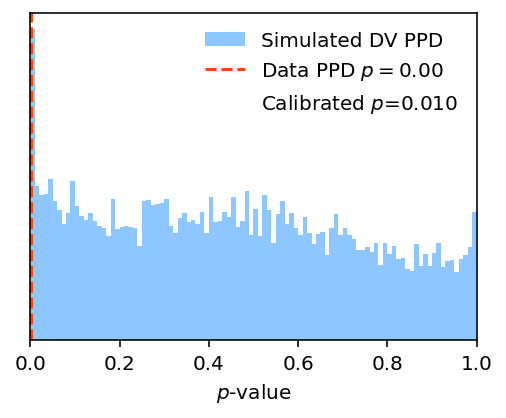

In [6]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim', 'gammat','wtheta'],
    data_sets_dprime=['xip','xim', 'gammat','wtheta'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.01,
    ndraws=1,
#     pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    get_zbin_pair_pcal=False,
    pvals_subsets={'gammat':None, '2x2':None},
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


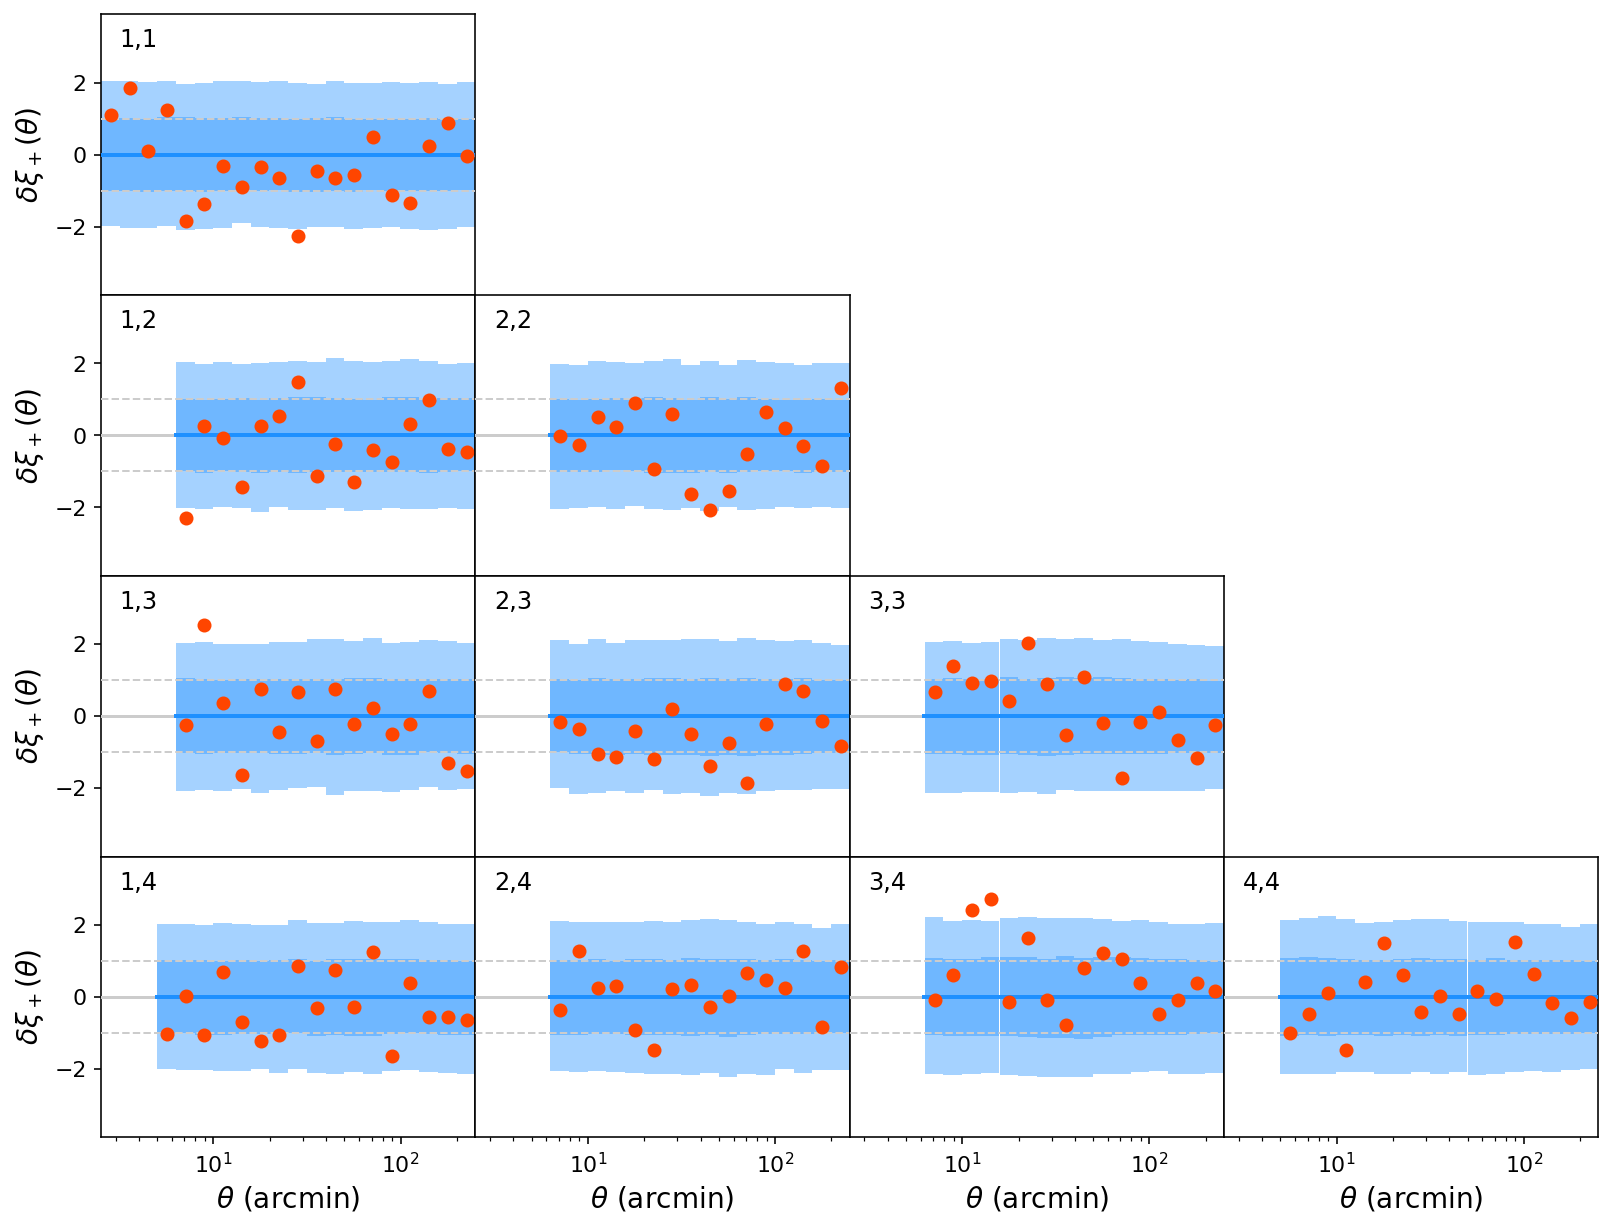

Using DV.fits covariance for chi2


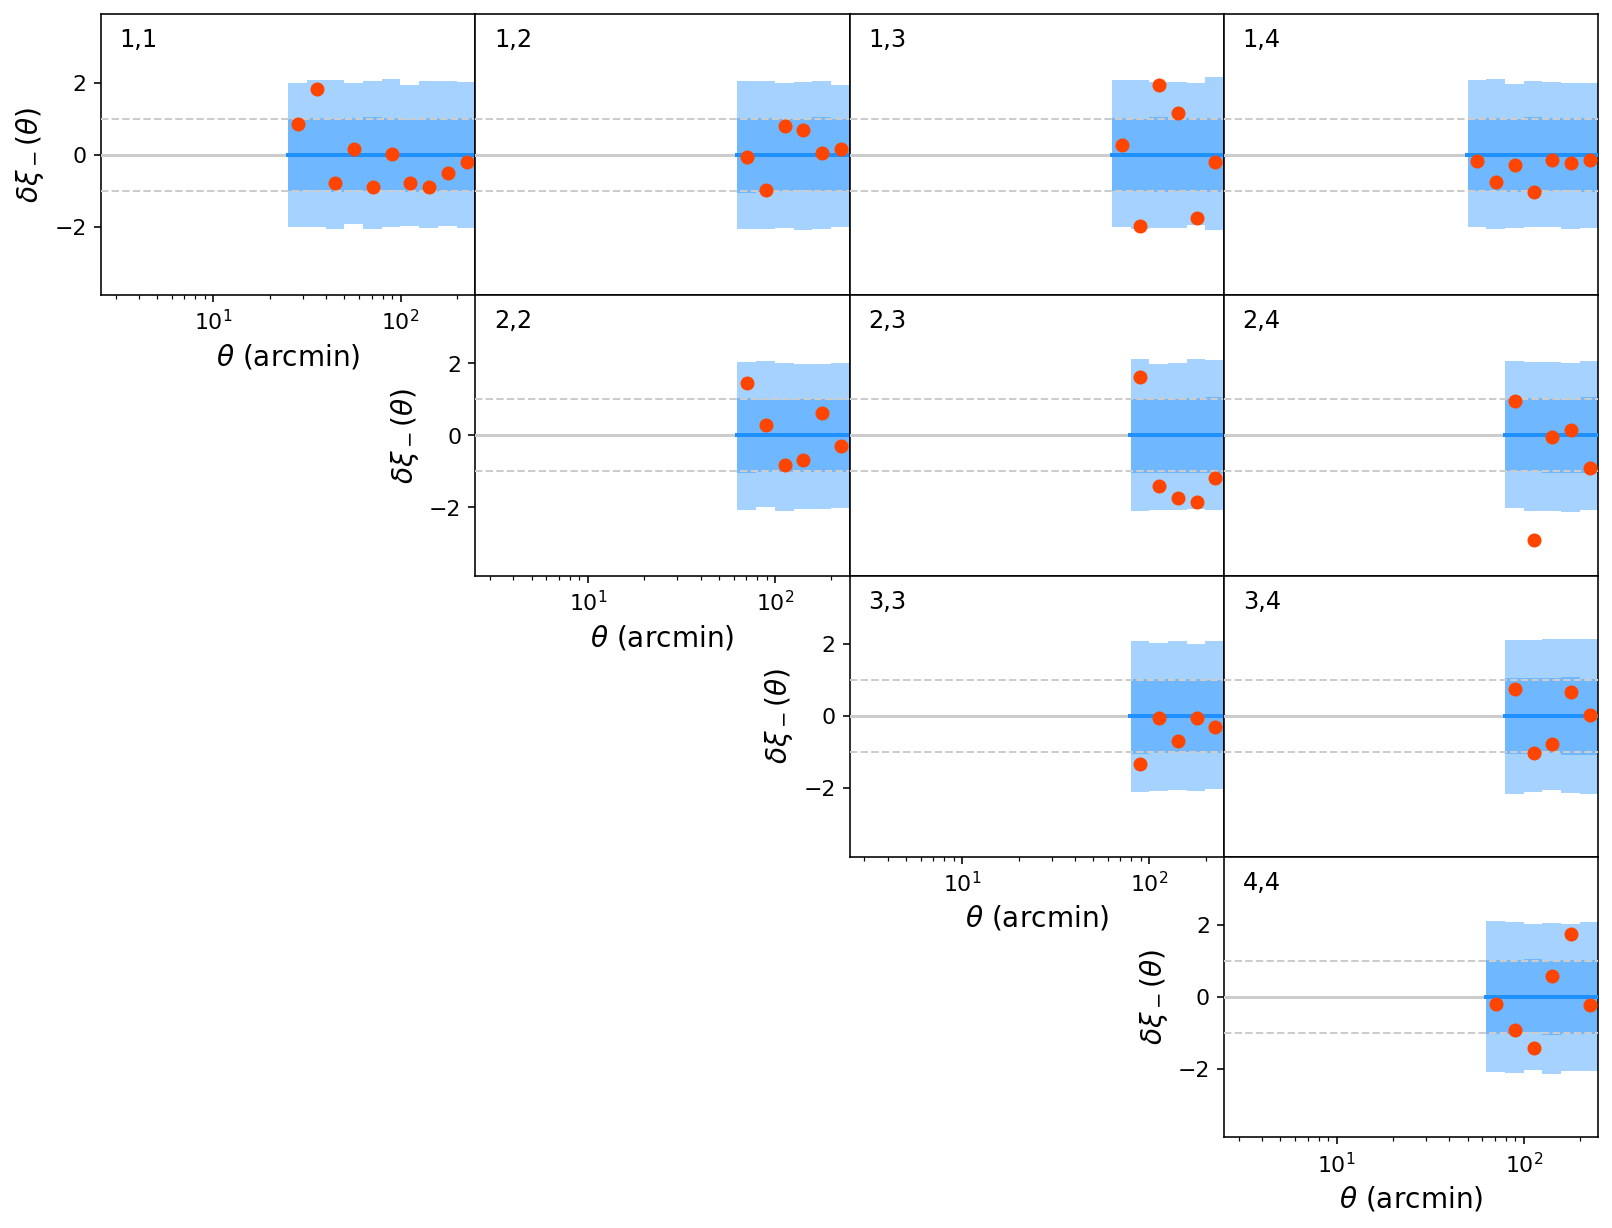

Using DV.fits covariance for chi2


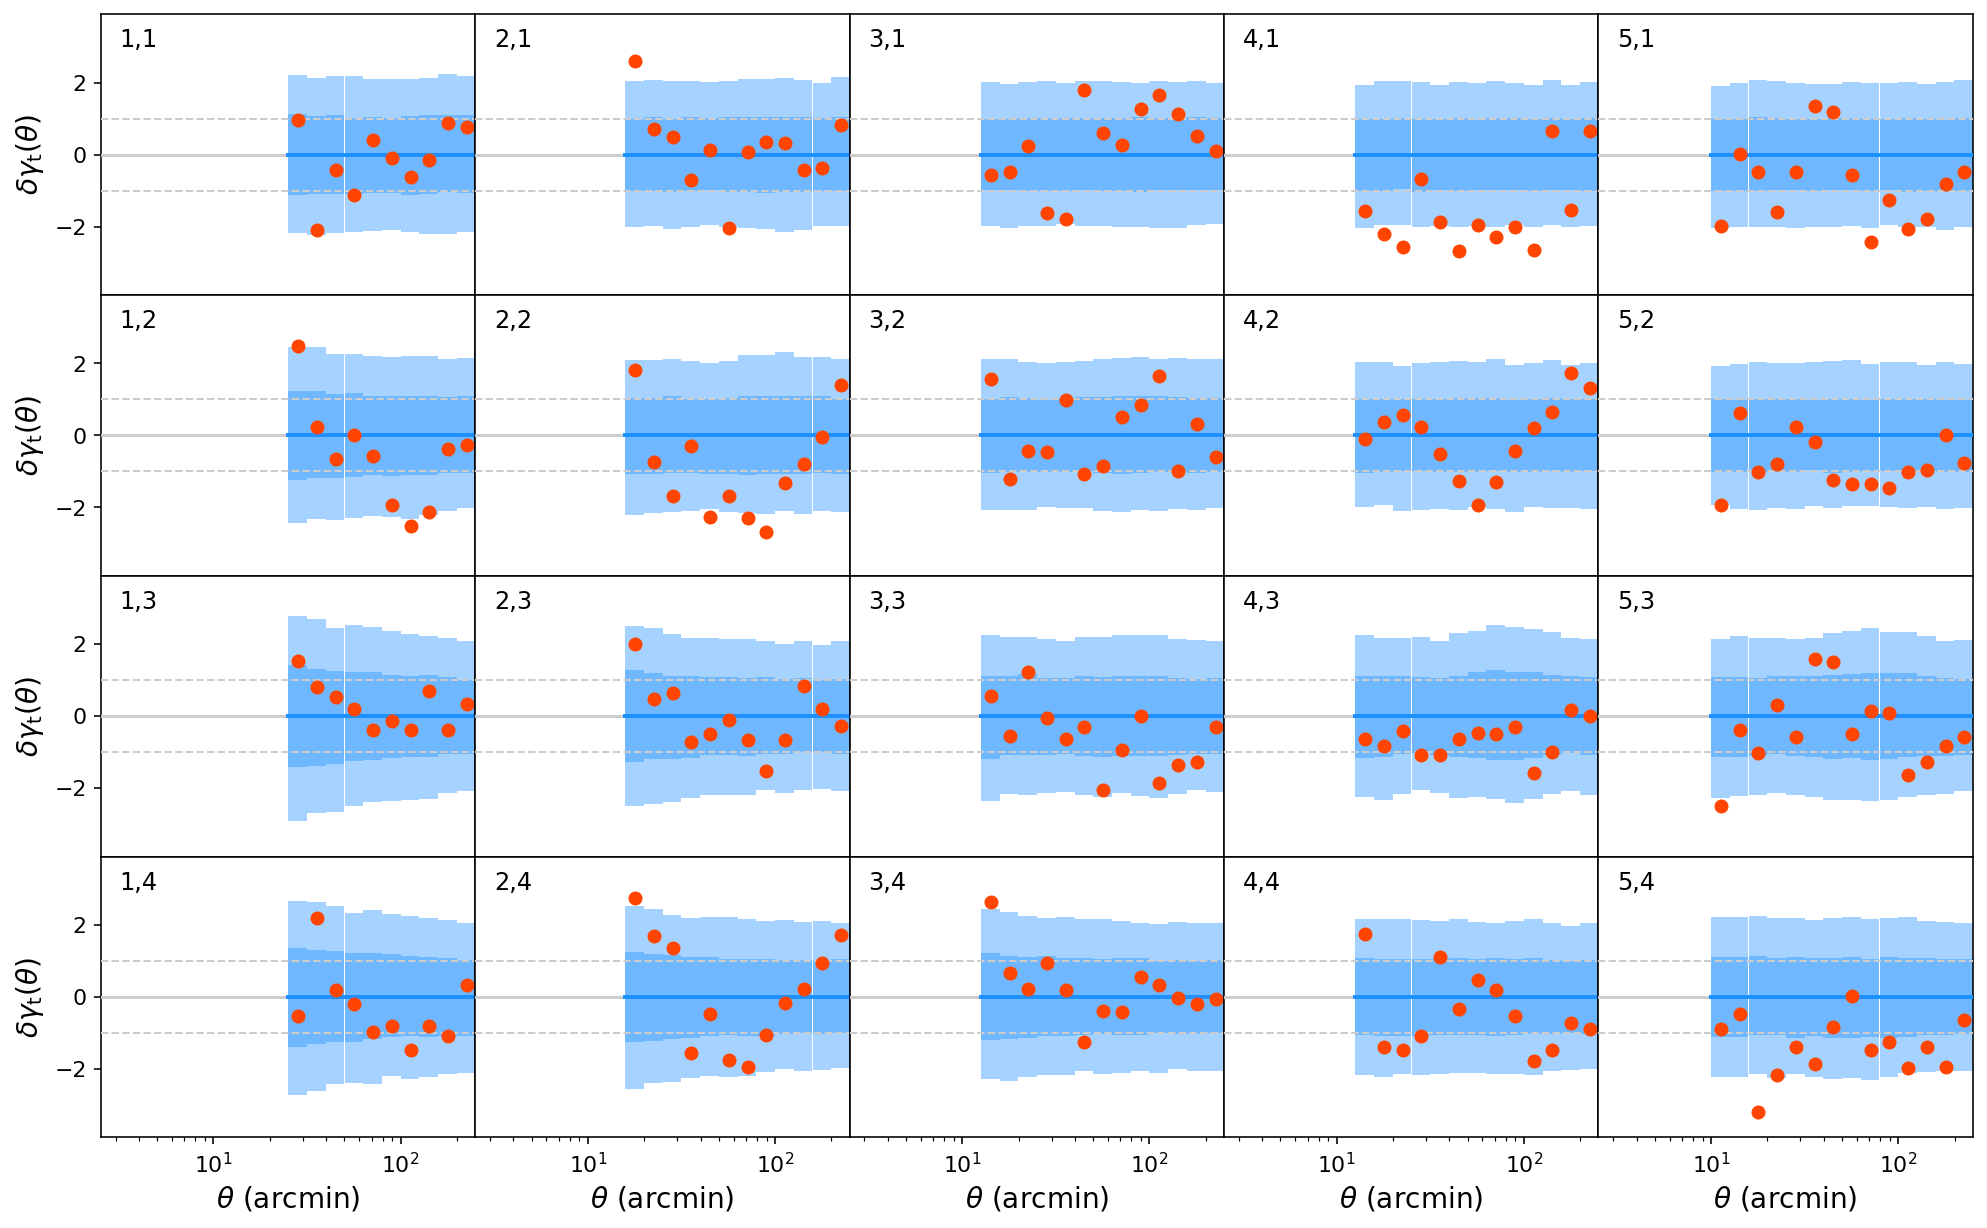

Using DV.fits covariance for chi2


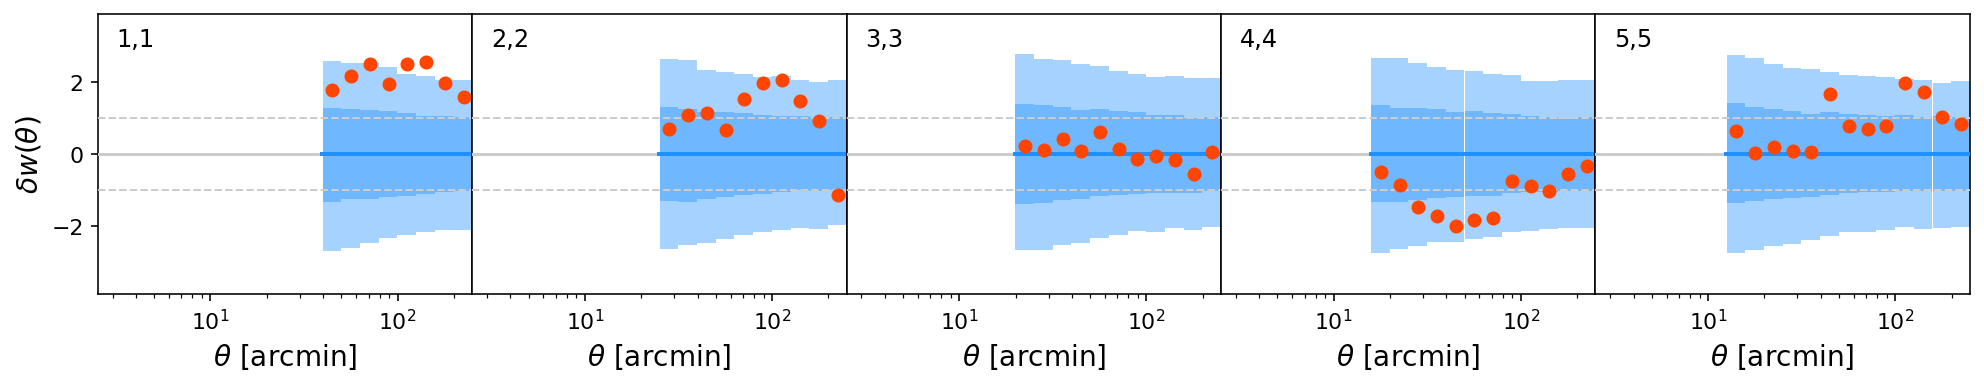

In [7]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 5, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 5, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


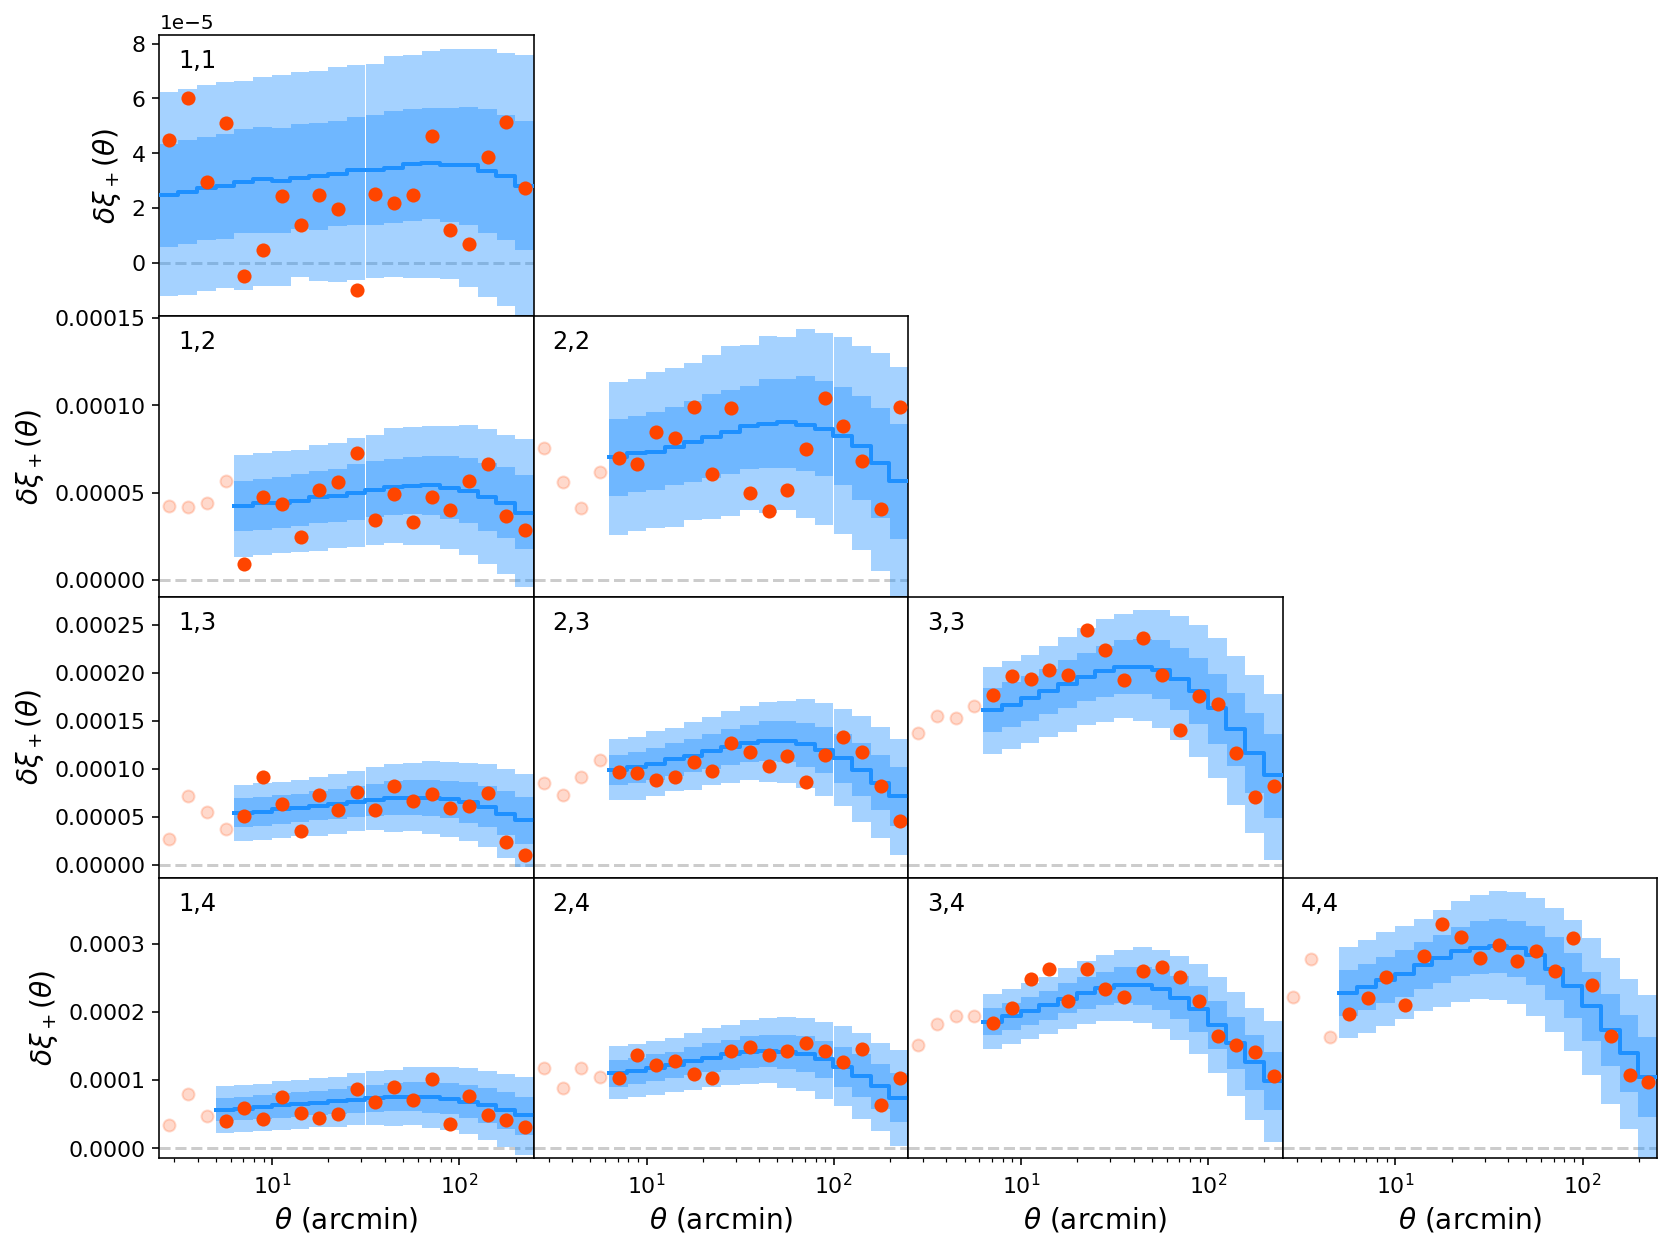

Using DV.fits covariance for chi2


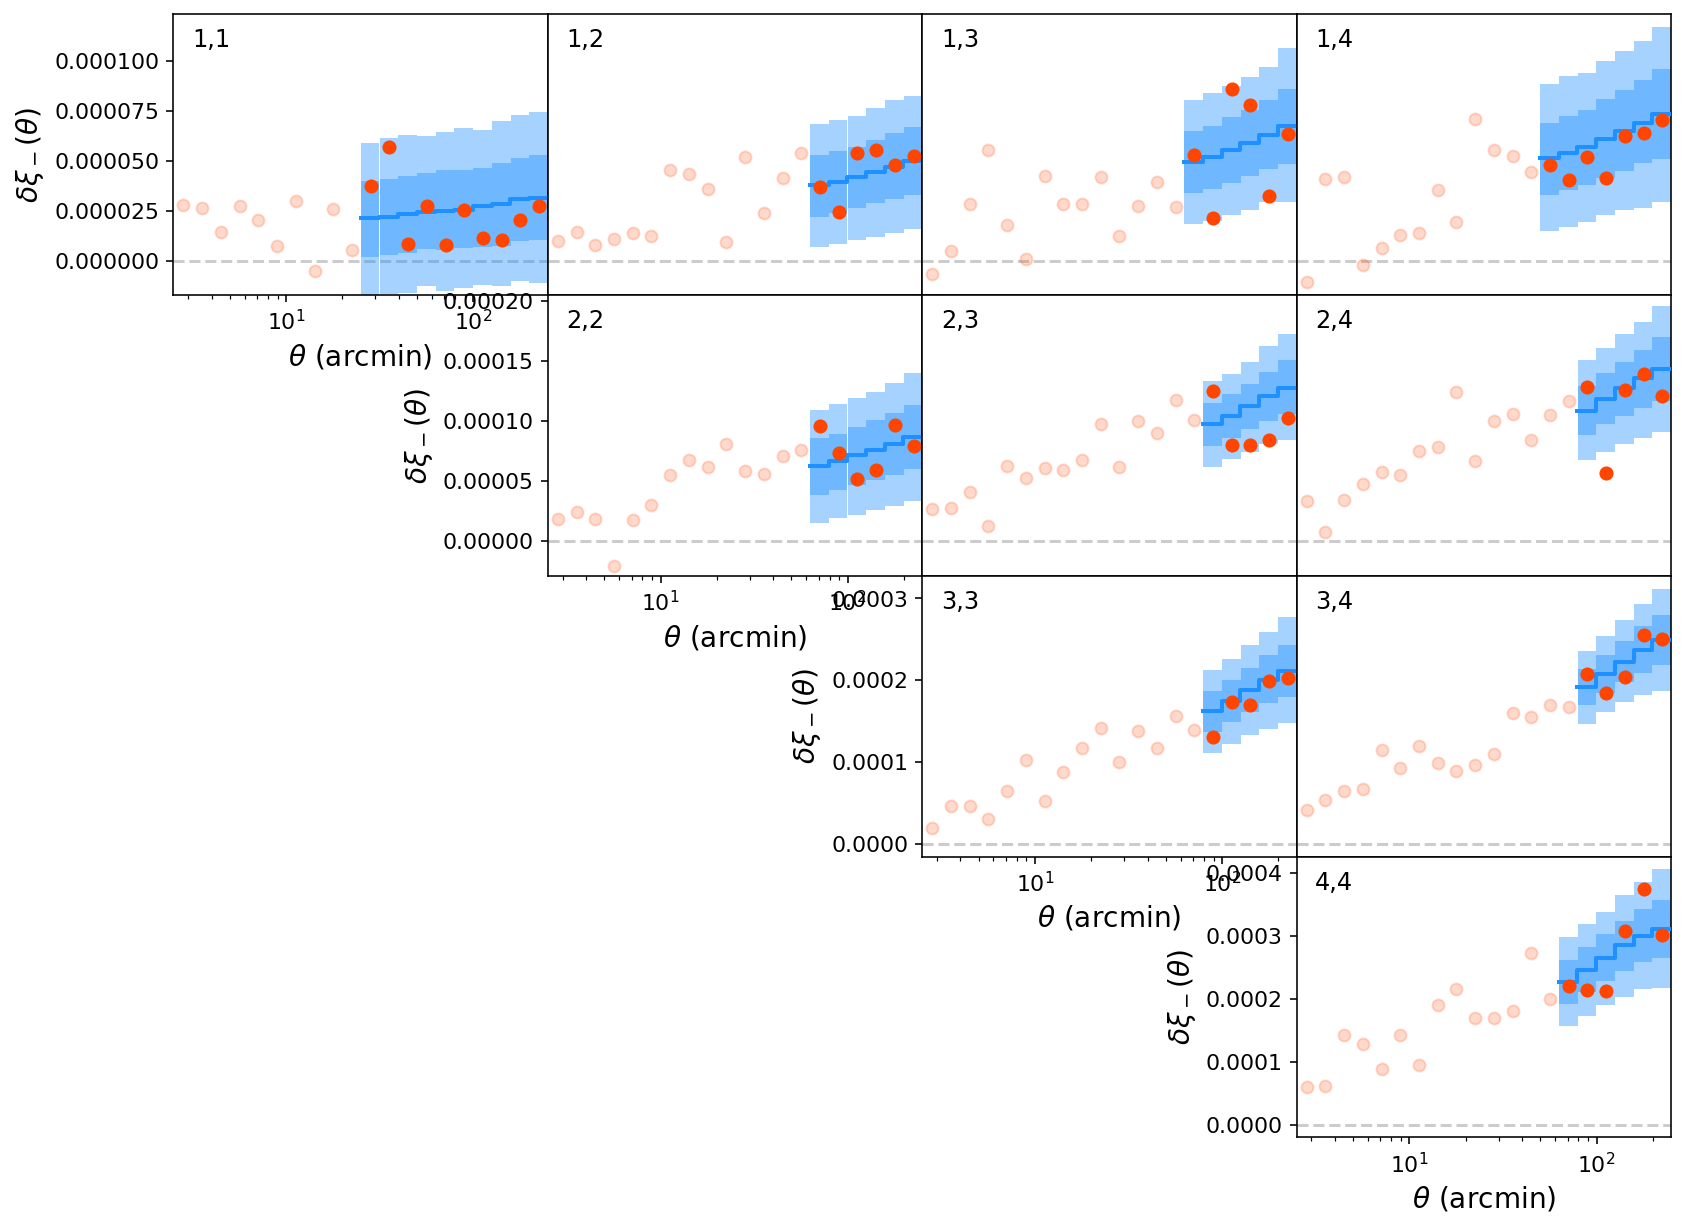

Using DV.fits covariance for chi2


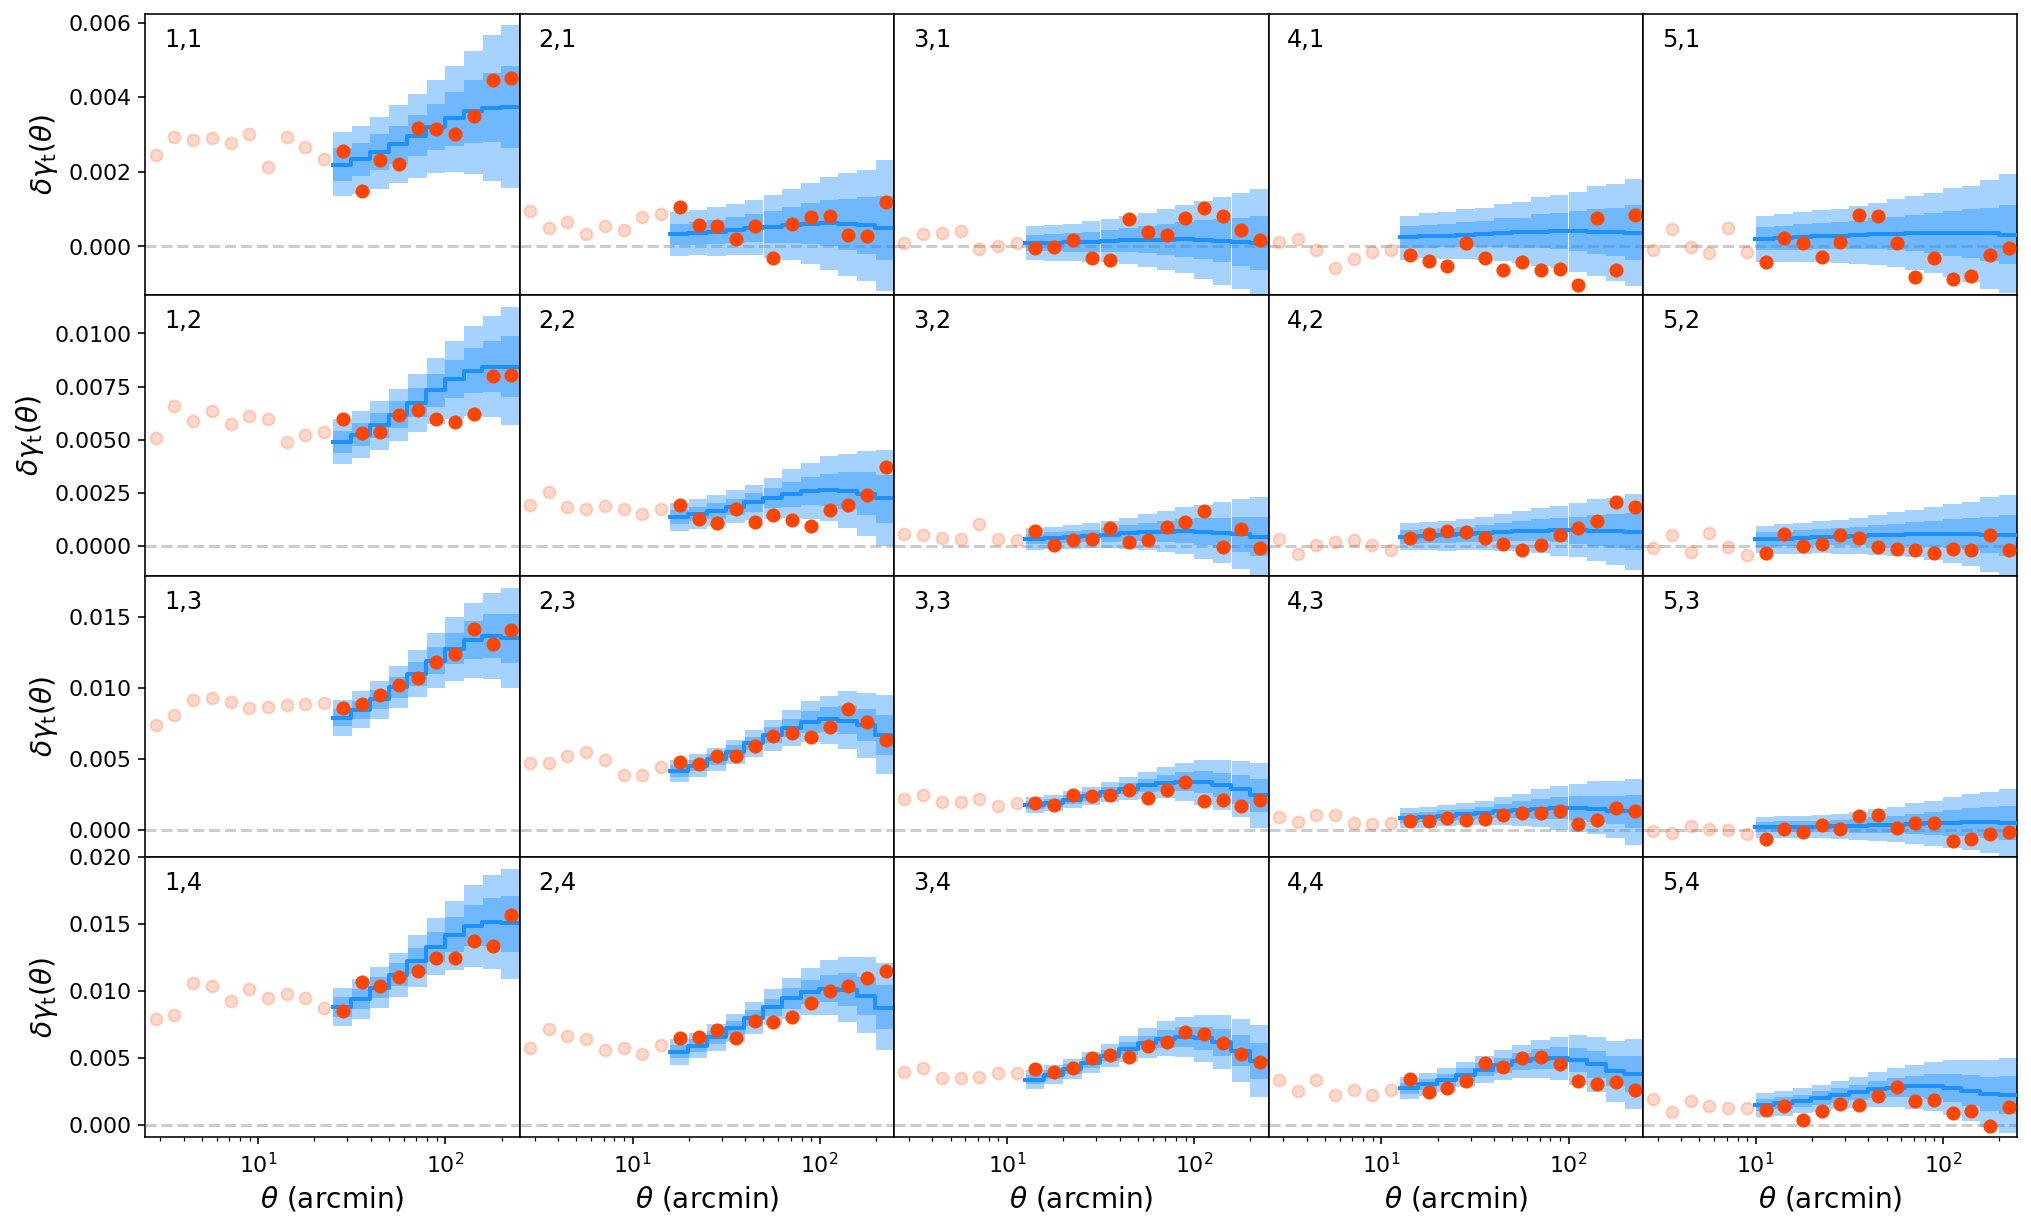

Using DV.fits covariance for chi2


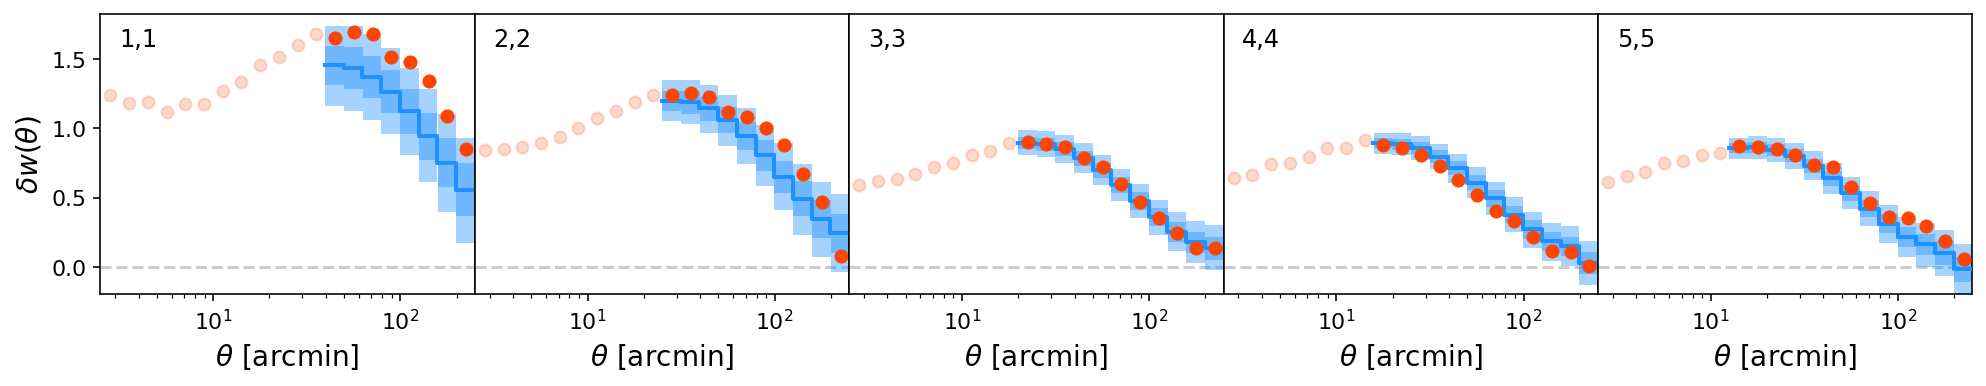

In [8]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 5, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 5, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# 2x2 goodness of fit

In [9]:
RUN_NAME = '2x2_0321'
RUN_NAME_PPD = 'fiducial_2x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['gammat', 'wtheta']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2_0321.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_5', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--b4', 'bias_lens--b5', 'intrinsic_alignment_parameters--a1', 'intrinsic_alig


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2_0321.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4)], 'wtheta': [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]}
Getting indices for gammat
Getting indices for wtheta

Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood mo

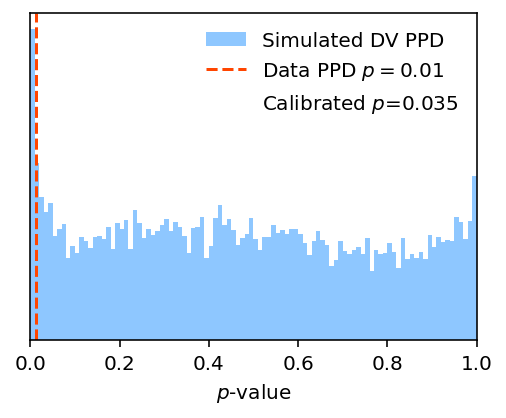

In [10]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['gammat','wtheta'],
    data_sets_dprime=['gammat','wtheta'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


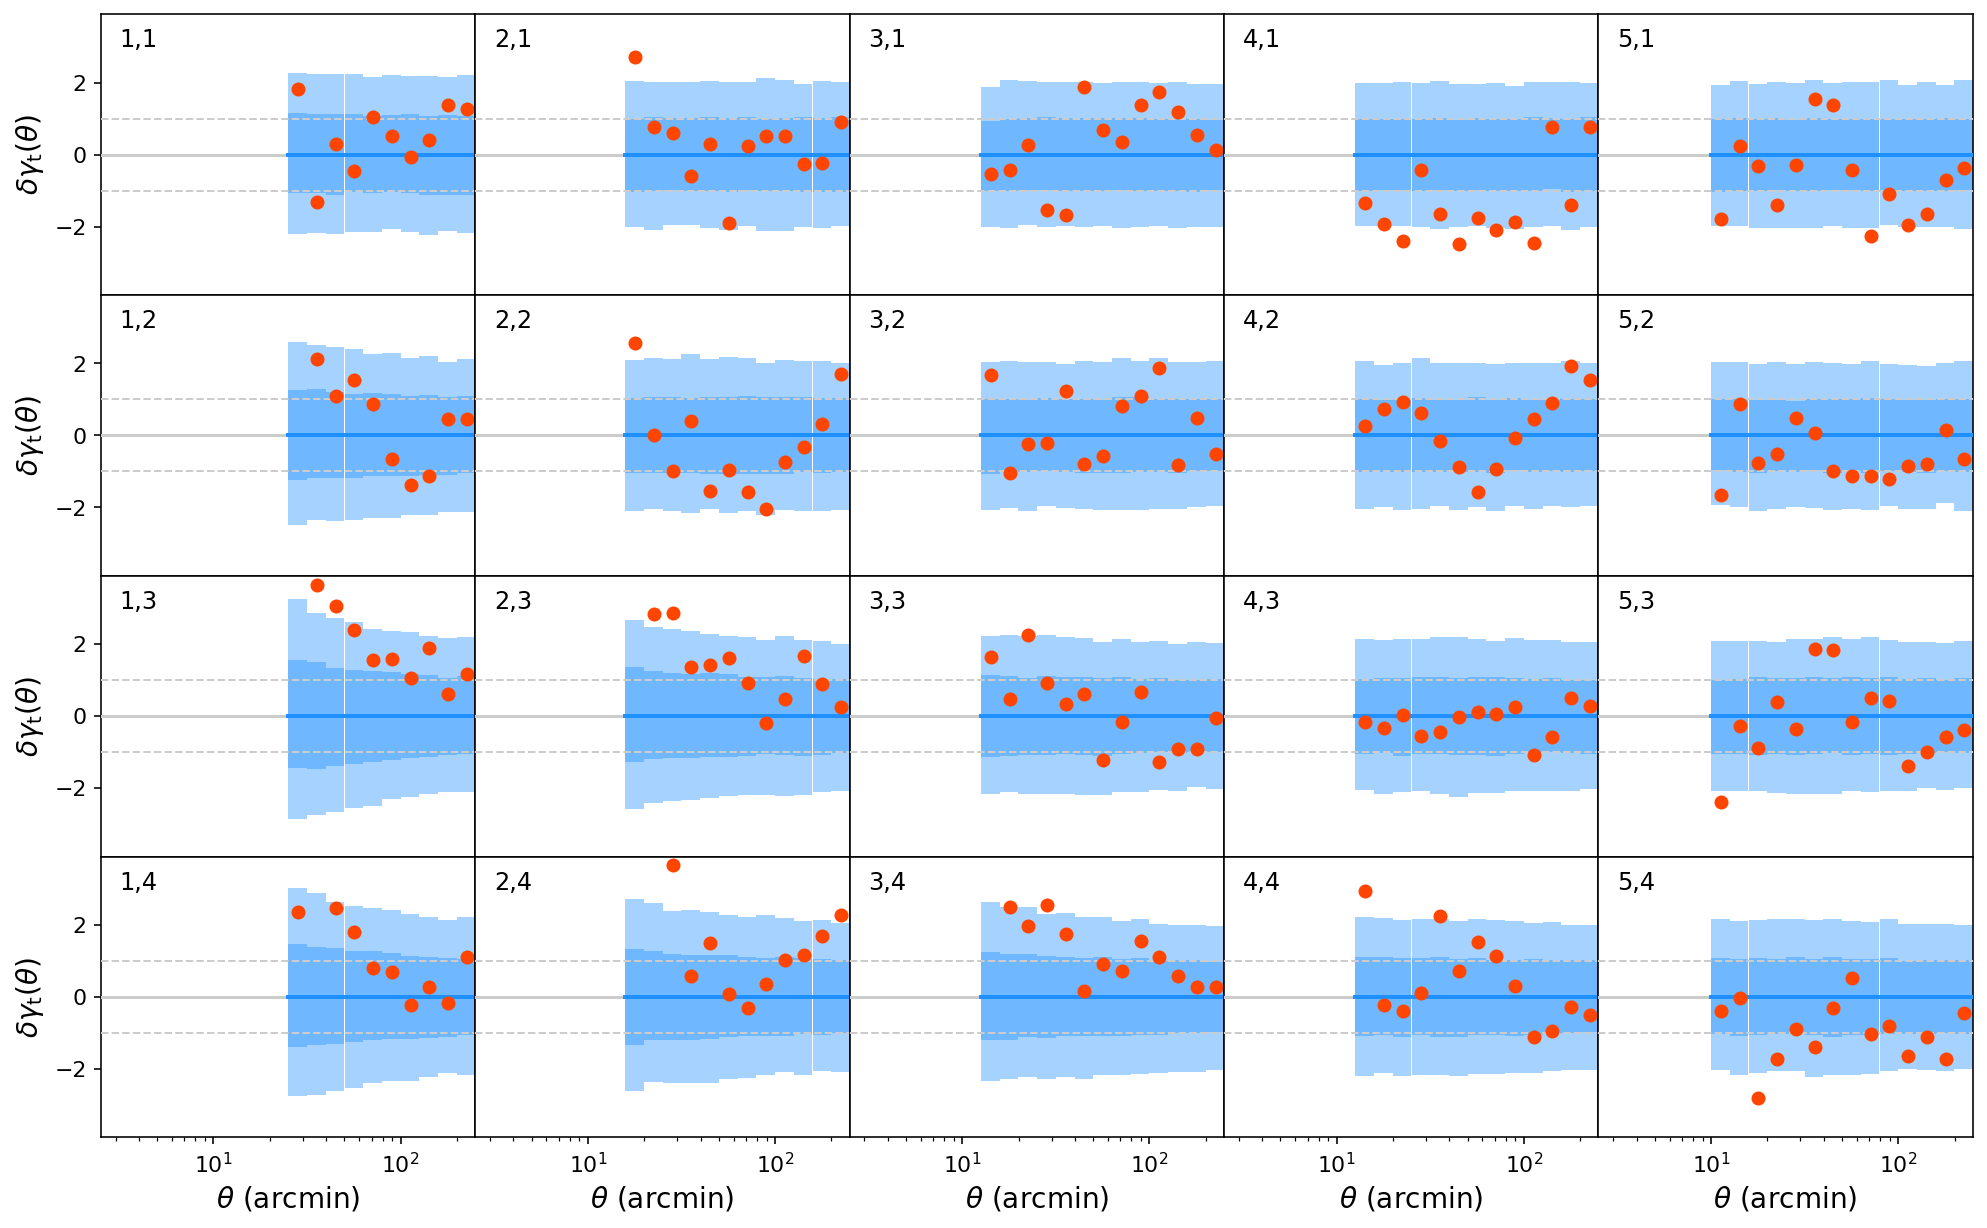

Using DV.fits covariance for chi2


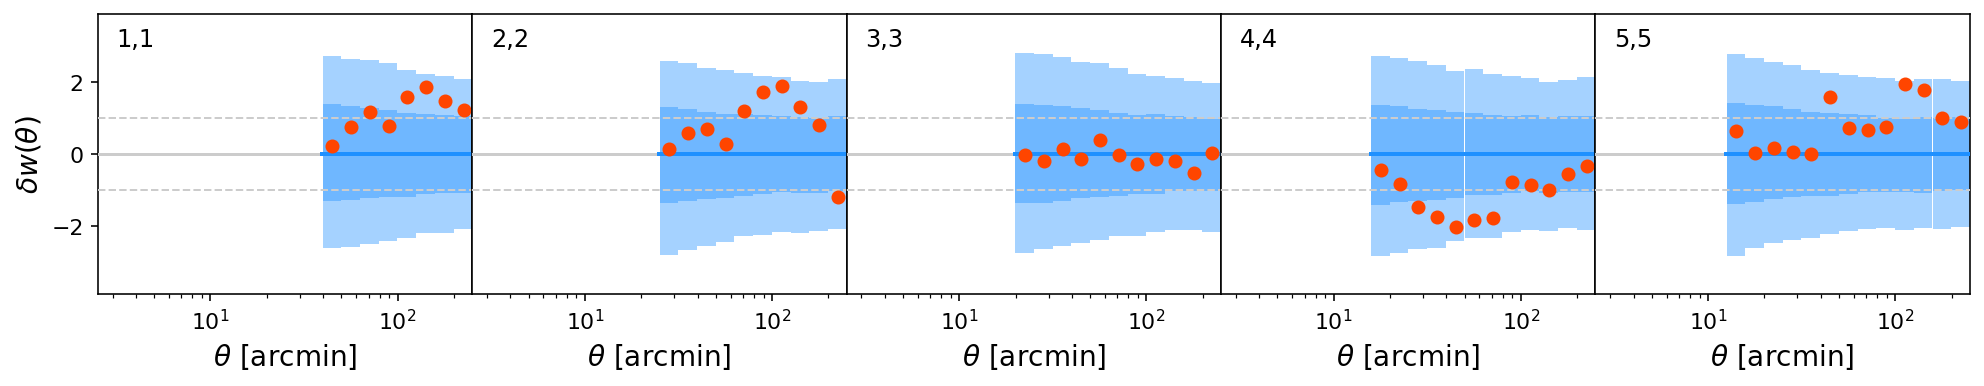

In [11]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 5, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 5, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


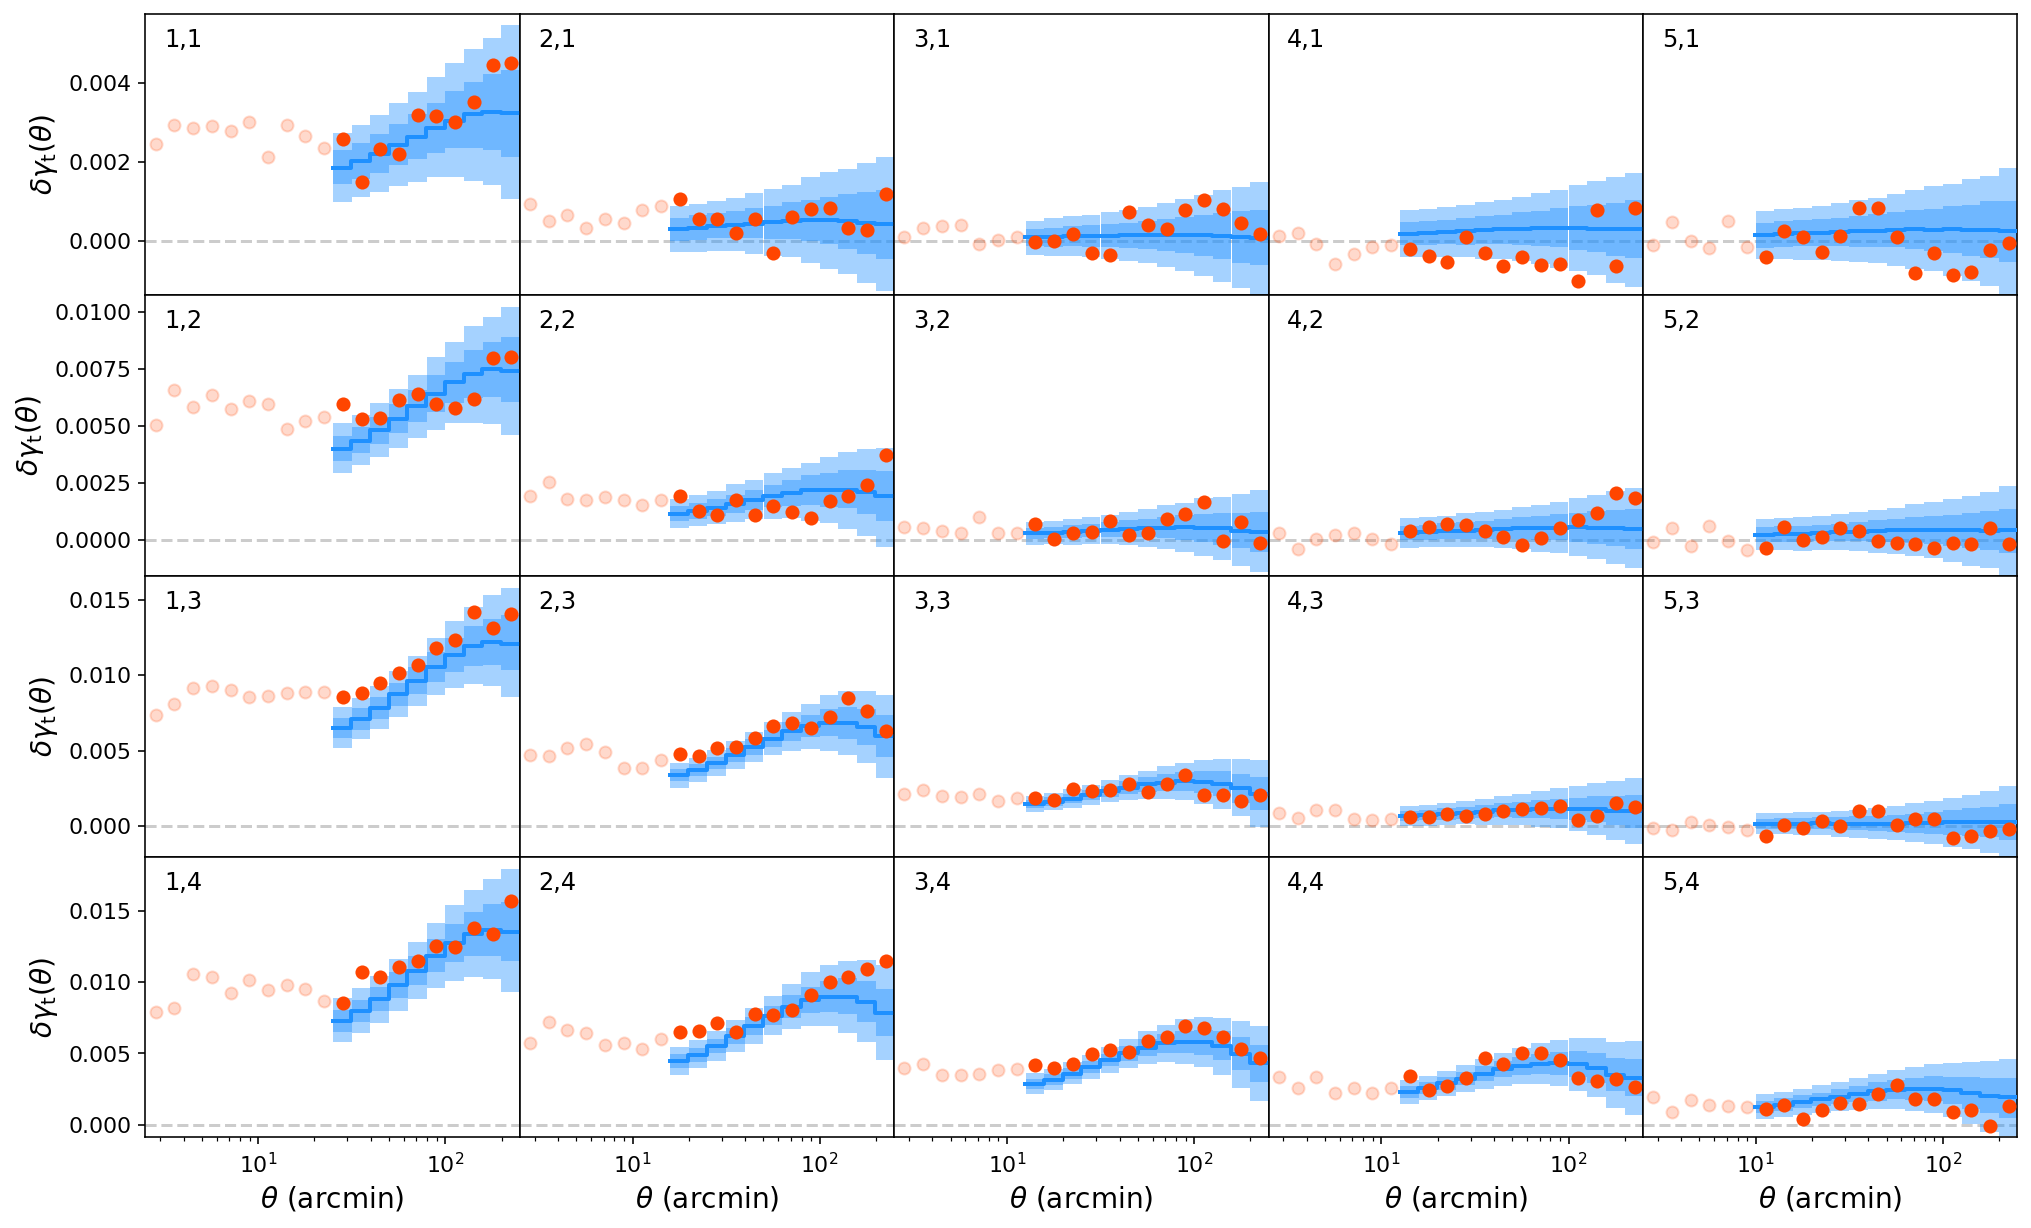

Using DV.fits covariance for chi2


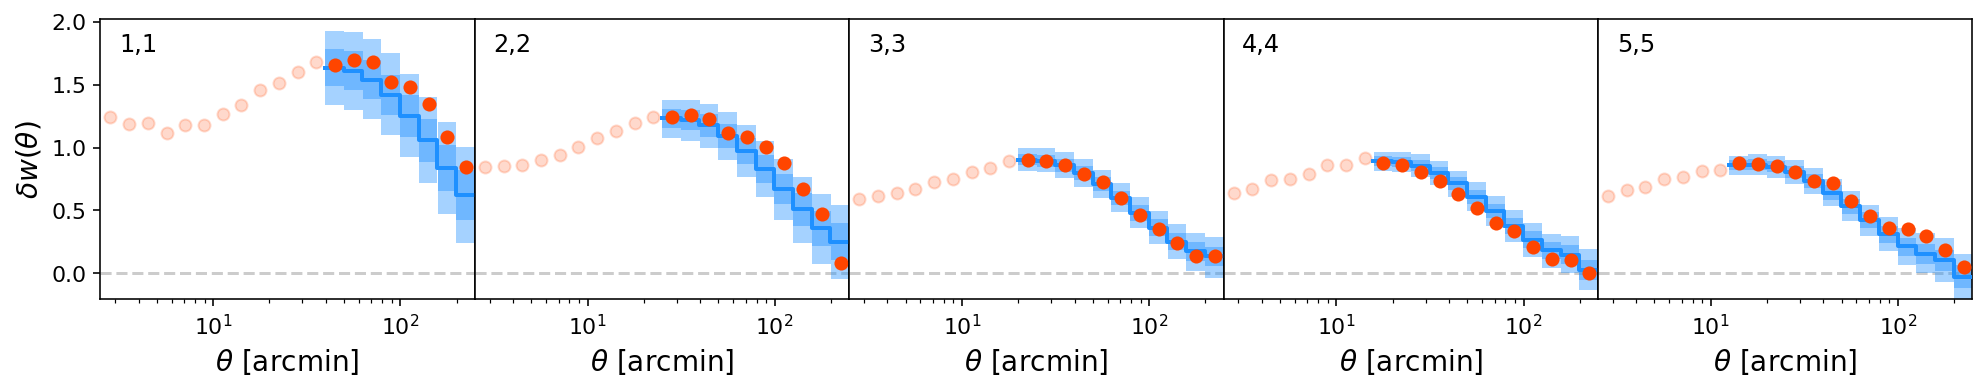

In [12]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 5, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 5, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# 1x2 goodness of fit

In [13]:
RUN_NAME = '1x2_0321'
RUN_NAME_PPD = 'fiducial_1x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xip', 'xim']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_1x2_0321.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intrinsic_alignment_parameters--alpha2', 'intrinsic_alignme


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_1x2_0321.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4)], 'wtheta': [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]}
Getting indices for xip
Getting indices for xim

Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module: 

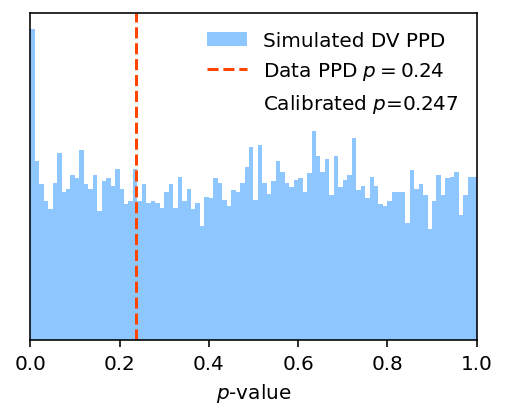

In [14]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


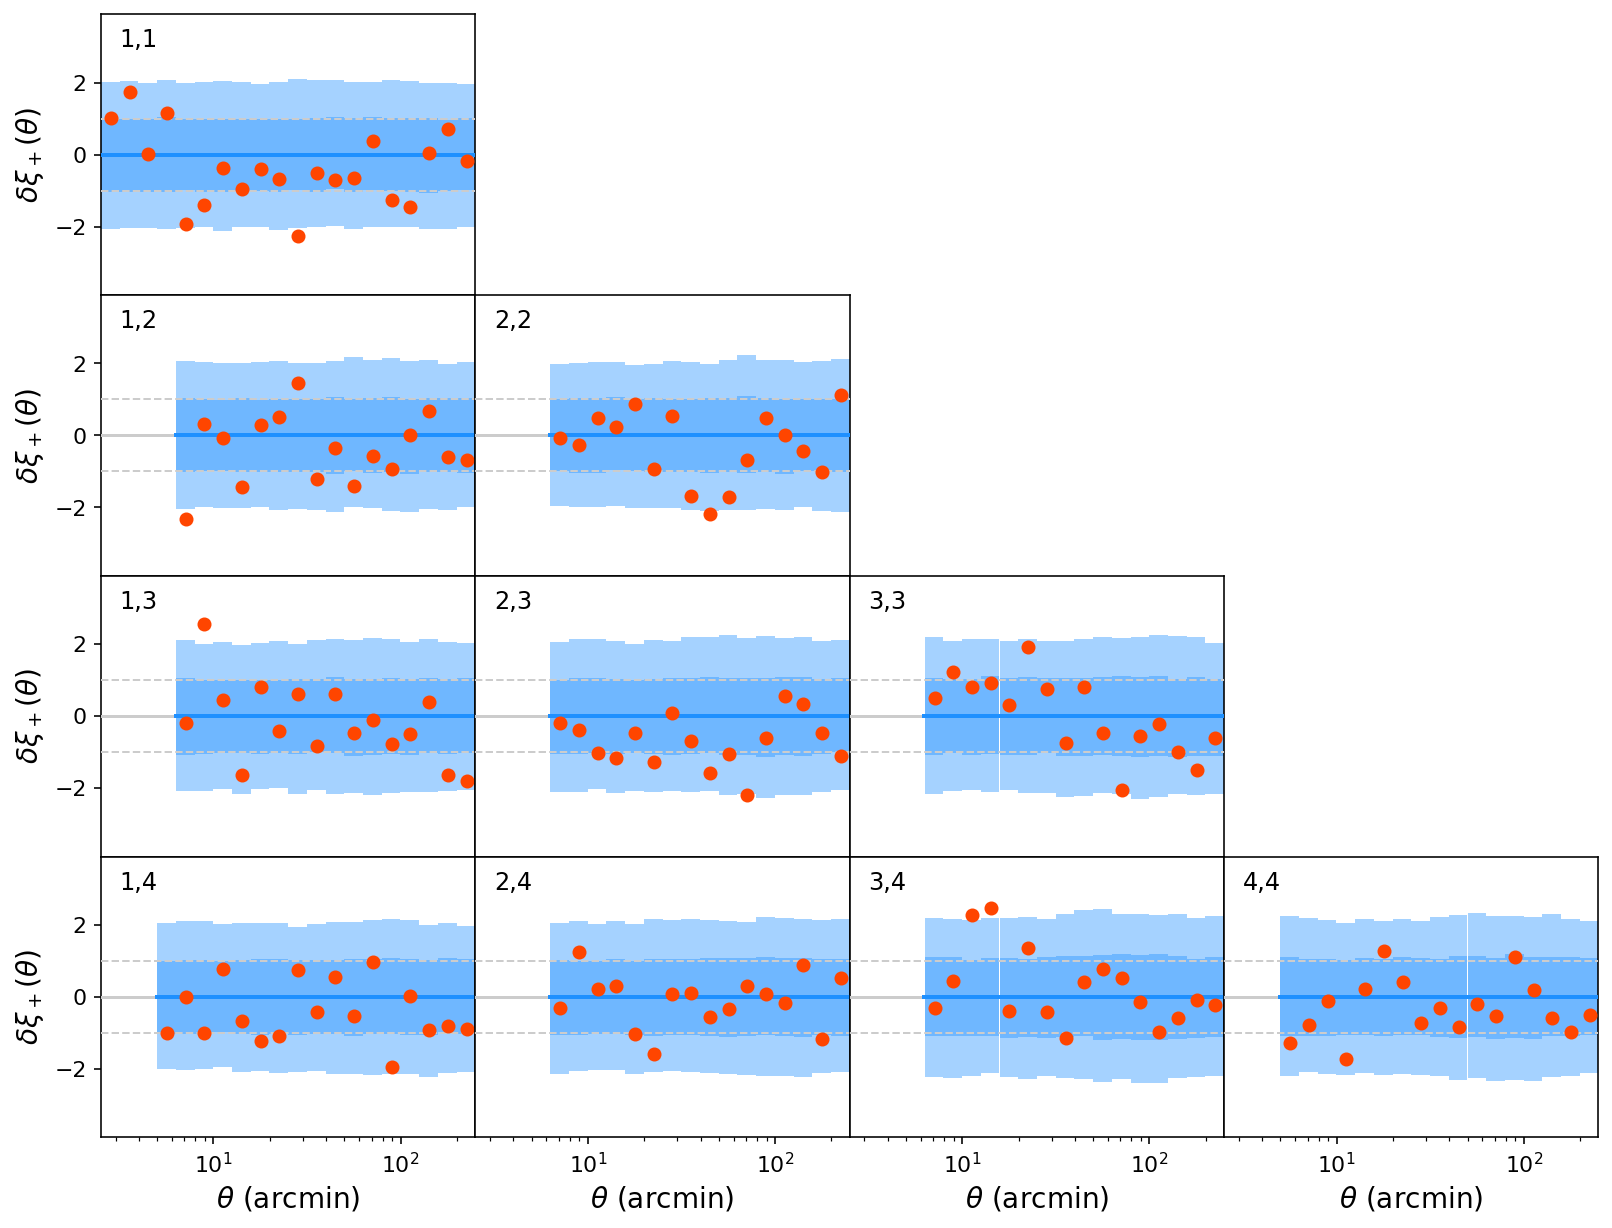

Using DV.fits covariance for chi2


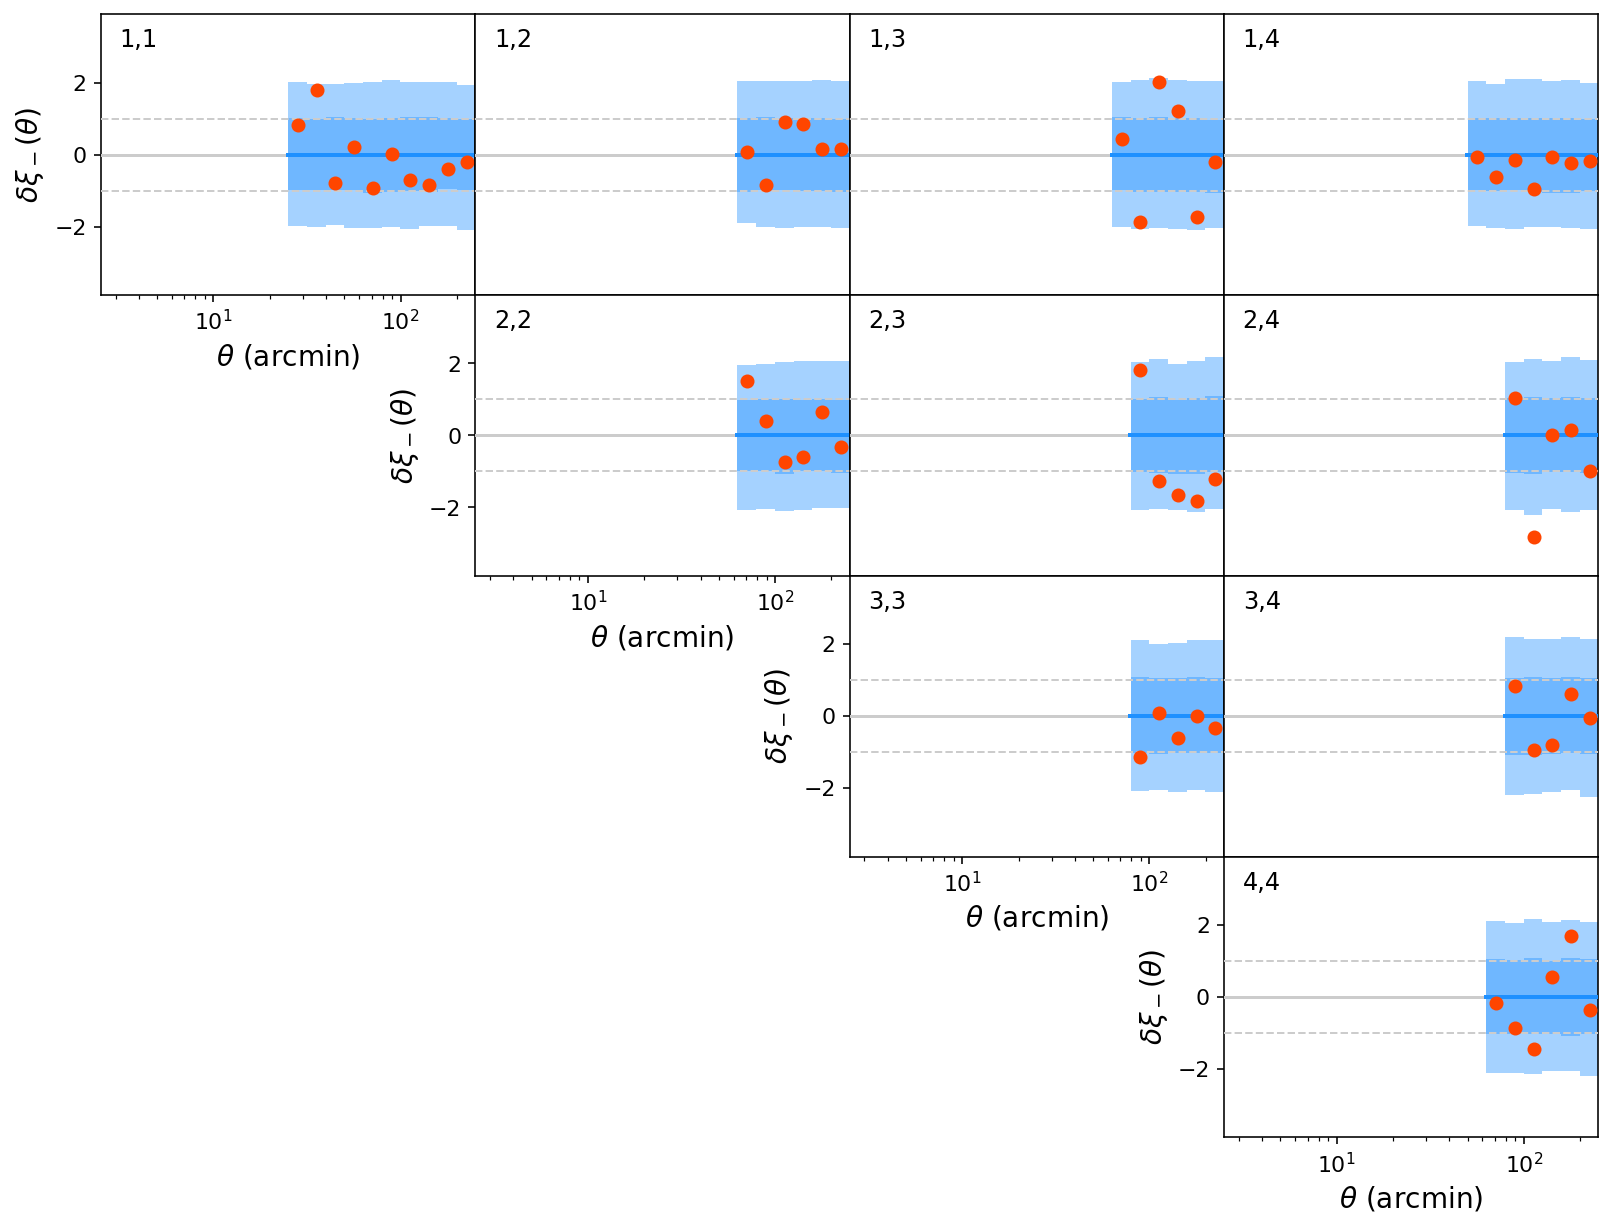

In [15]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


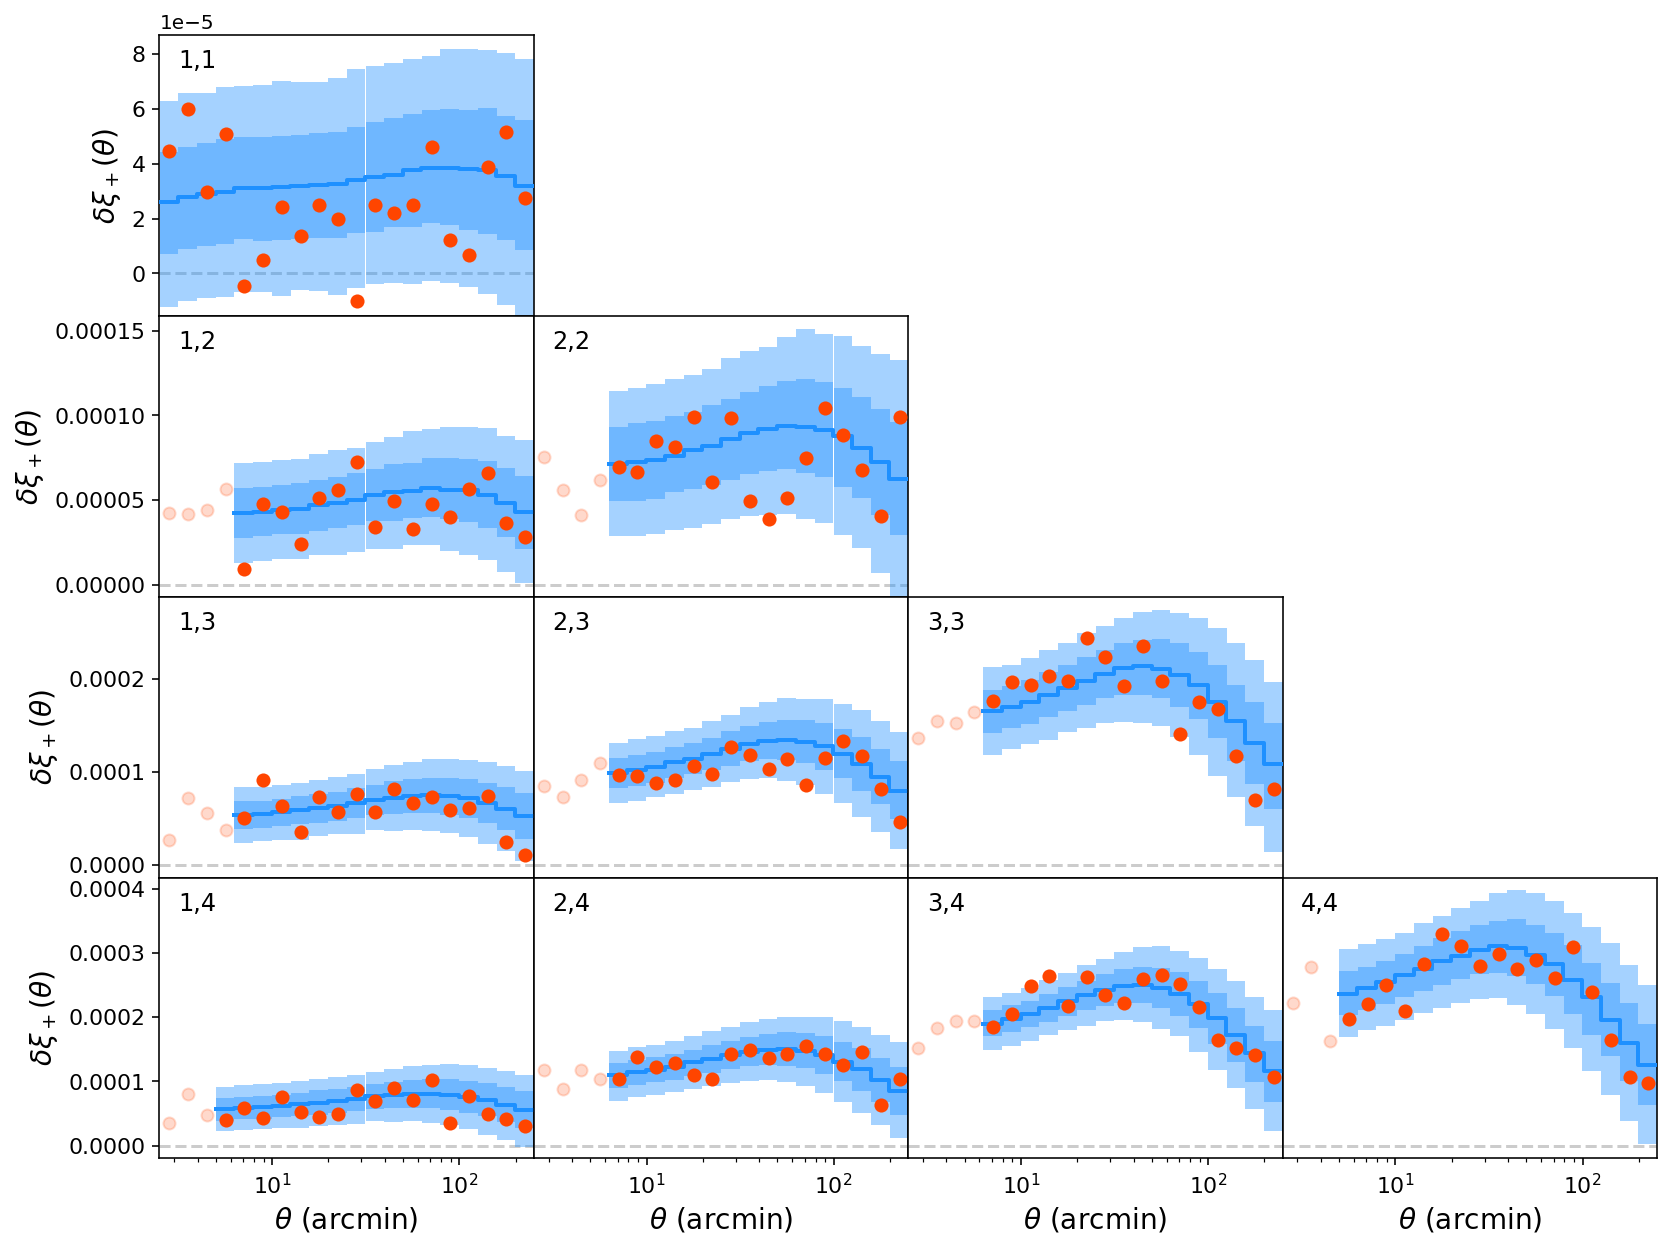

Using DV.fits covariance for chi2


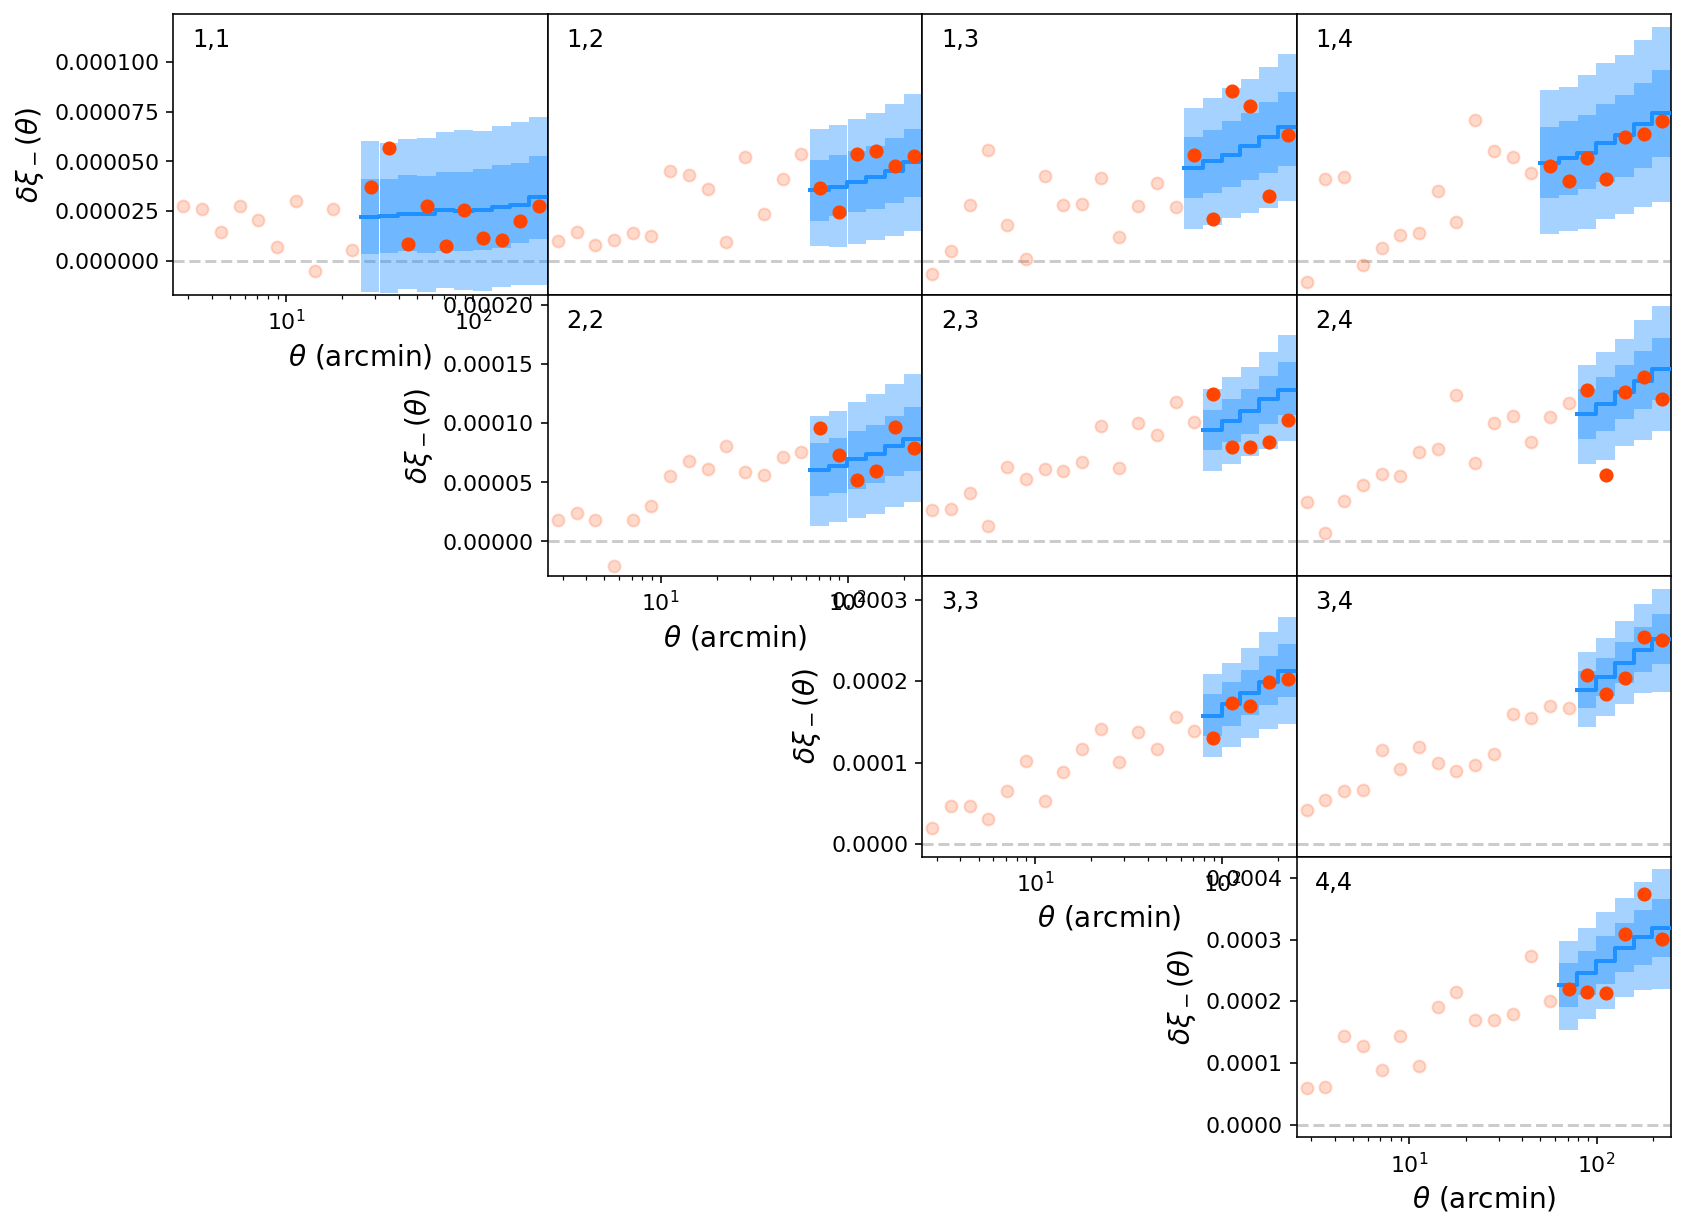

In [16]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# 1x2 vs 2x2

In [17]:
RUN_NAME = '2x2_0321'
RUN_NAME_PPD = 'fiducial_1x2_vs_2x2'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xip', 'xim']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2_0321.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_5', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--b4', 'bias_lens--b5', 'intrinsic_alignment_parameters--a1', 'intrinsic_alig


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_2x2_0321.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4)], 'wtheta': [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]}
Getting indices for gammat
Getting indices for wtheta

Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood mo

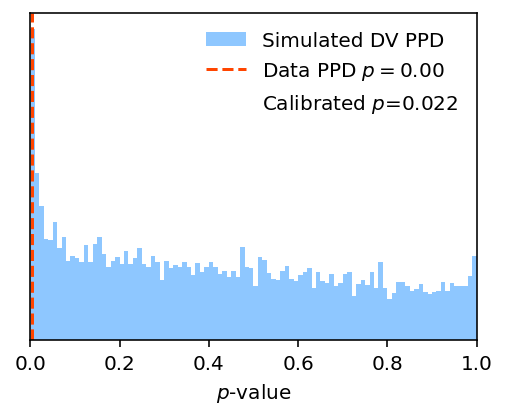

In [18]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['gammat', 'wtheta'],
    data_sets_dprime=['xip','xim'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


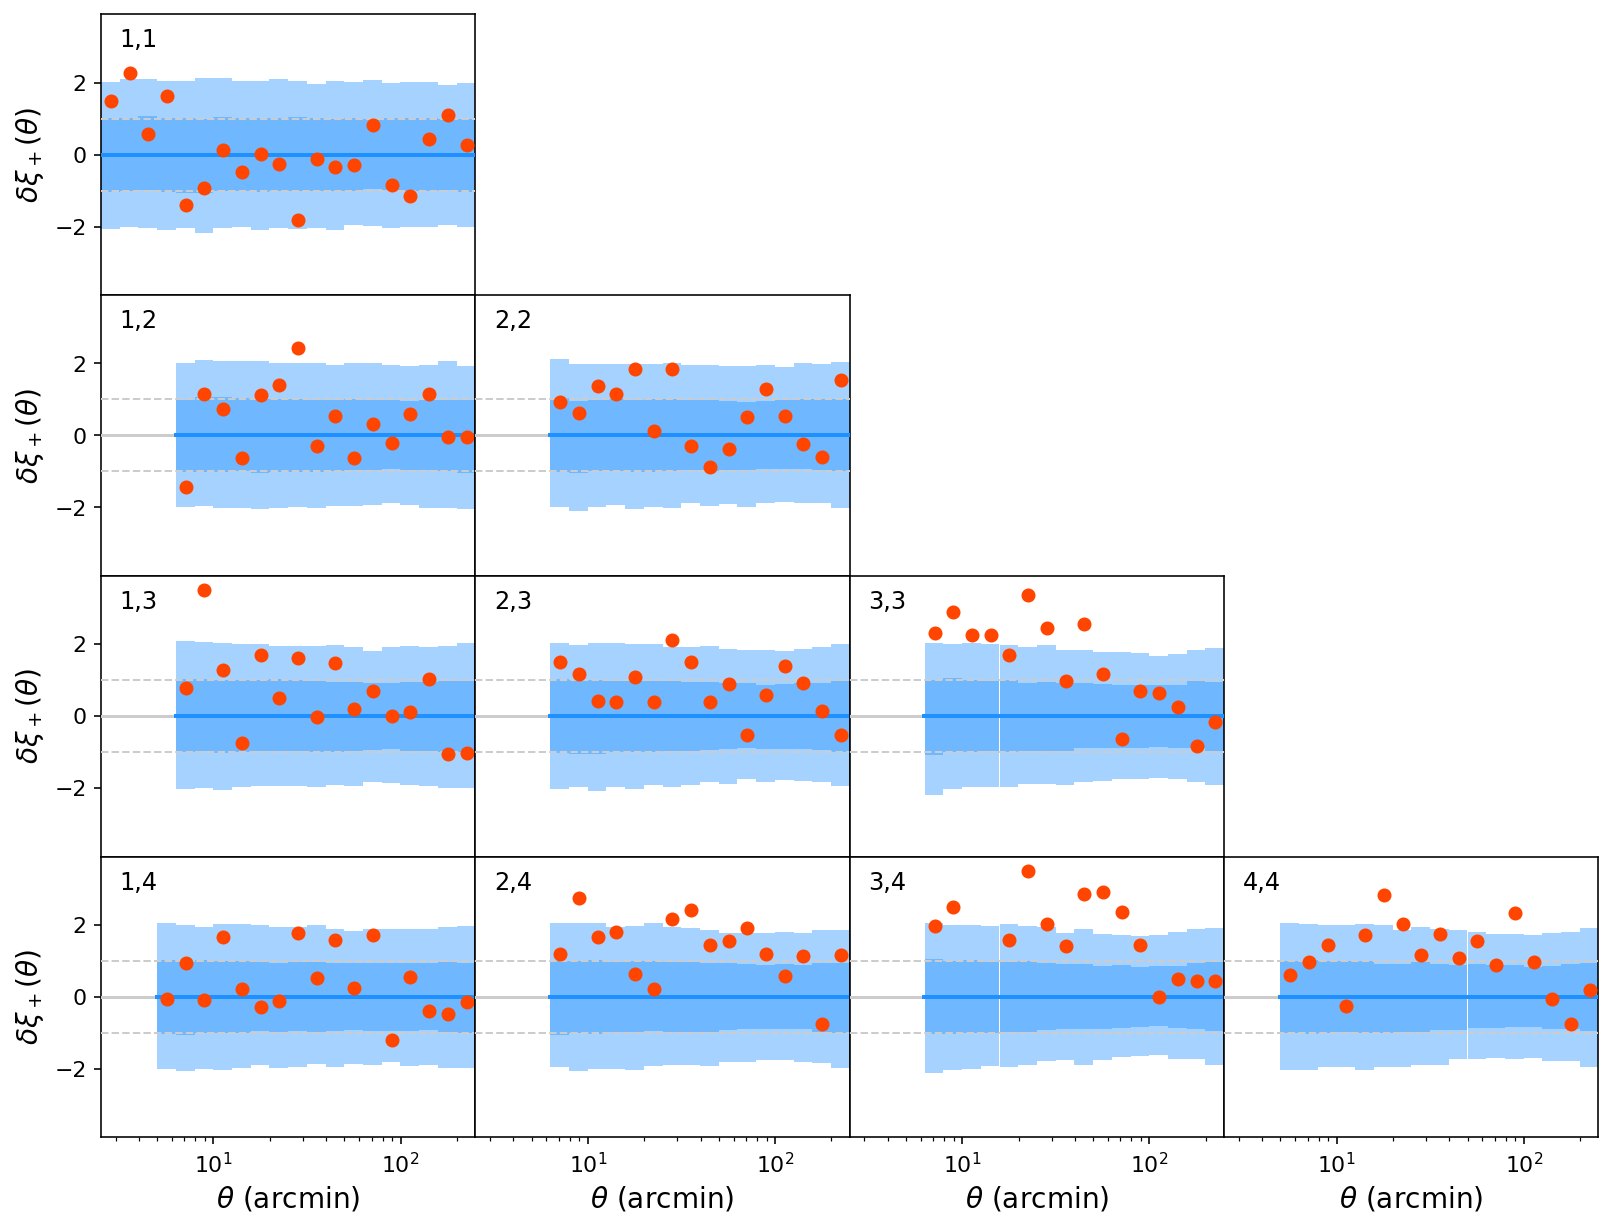

Using DV.fits covariance for chi2


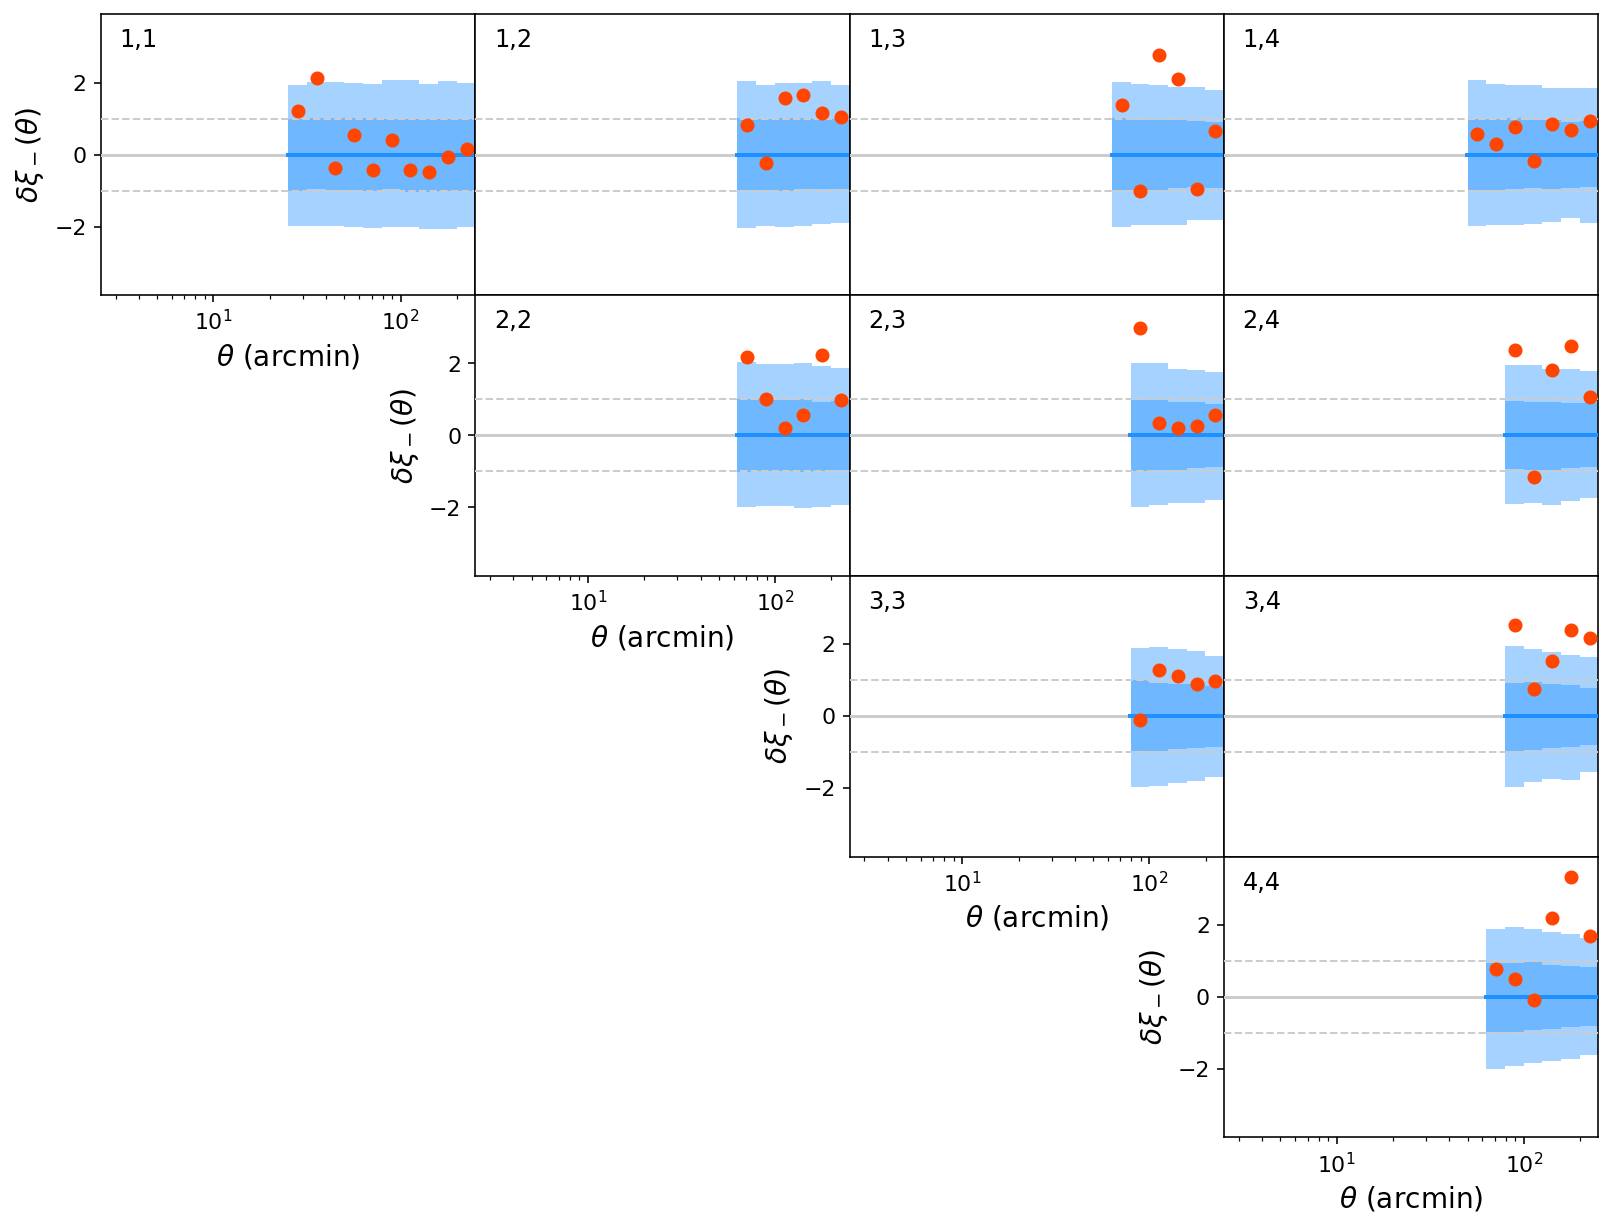

In [19]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


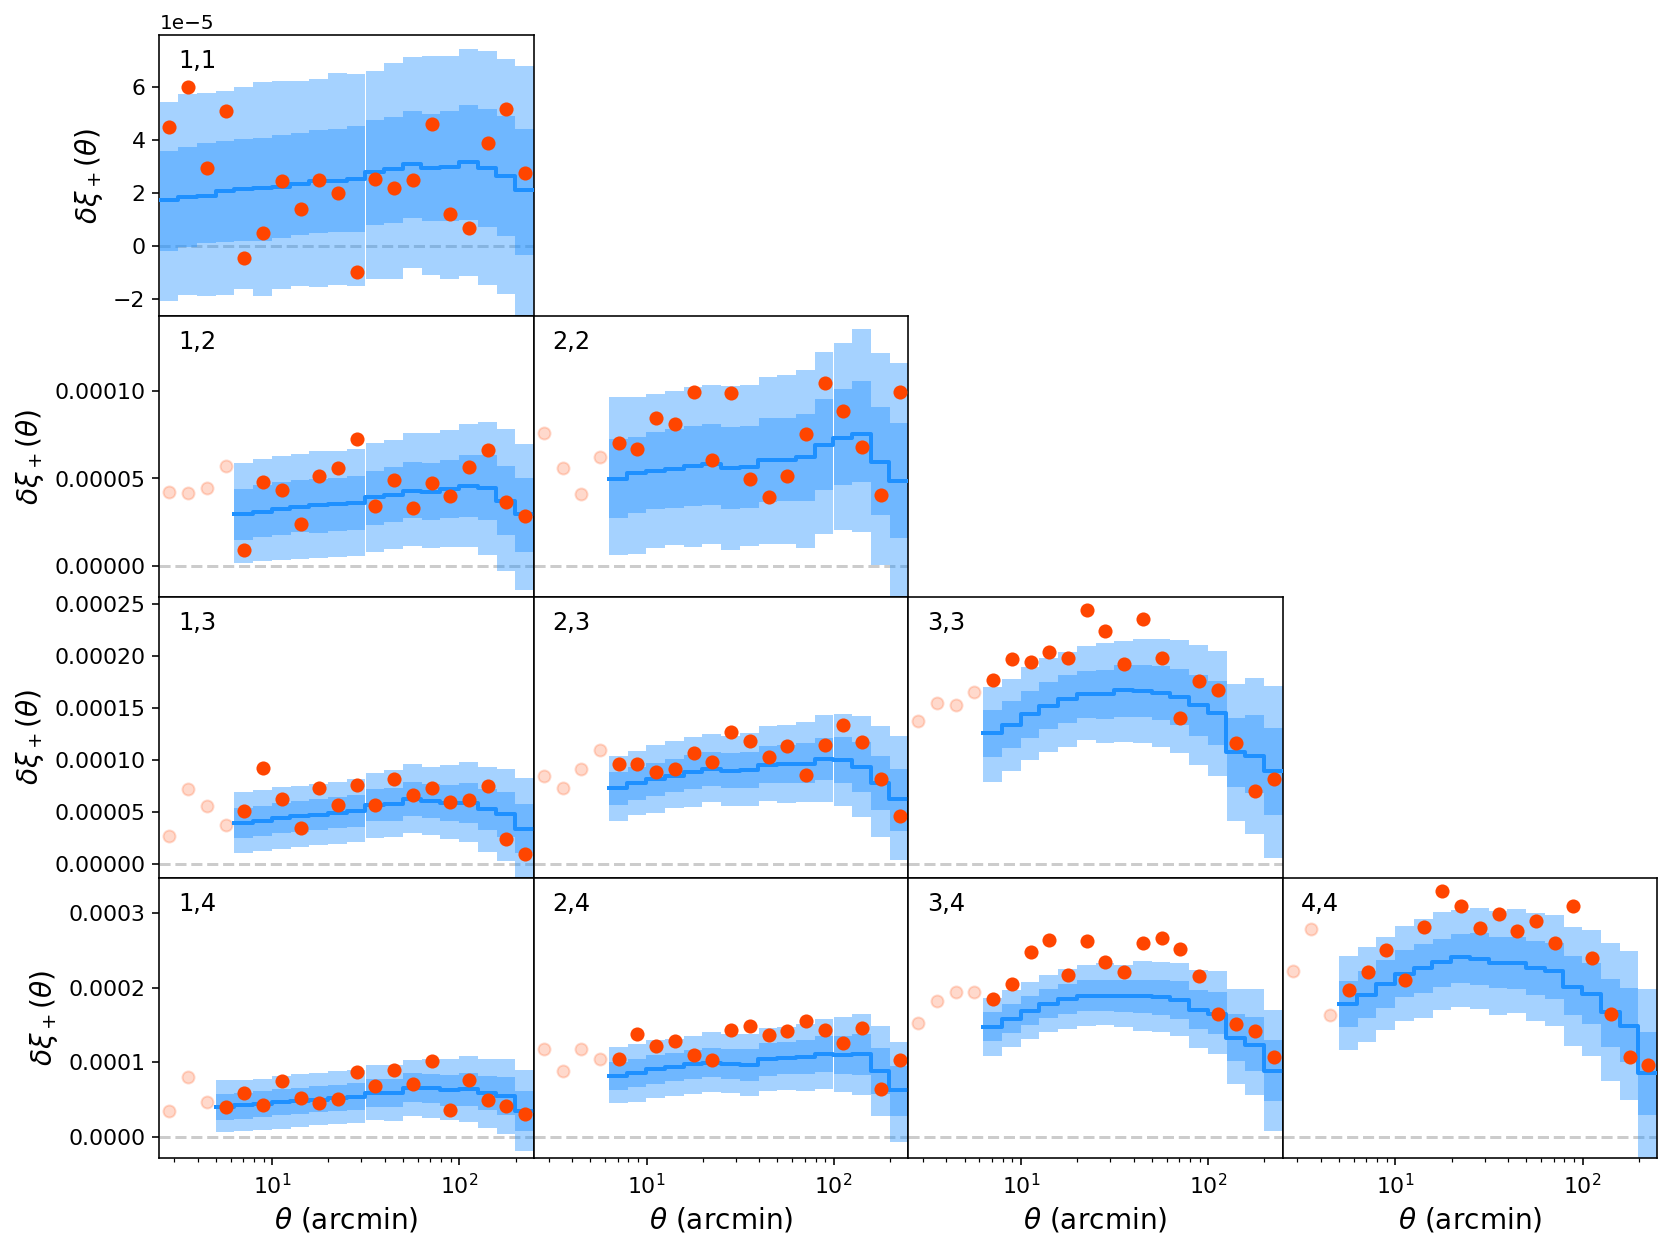

Using DV.fits covariance for chi2


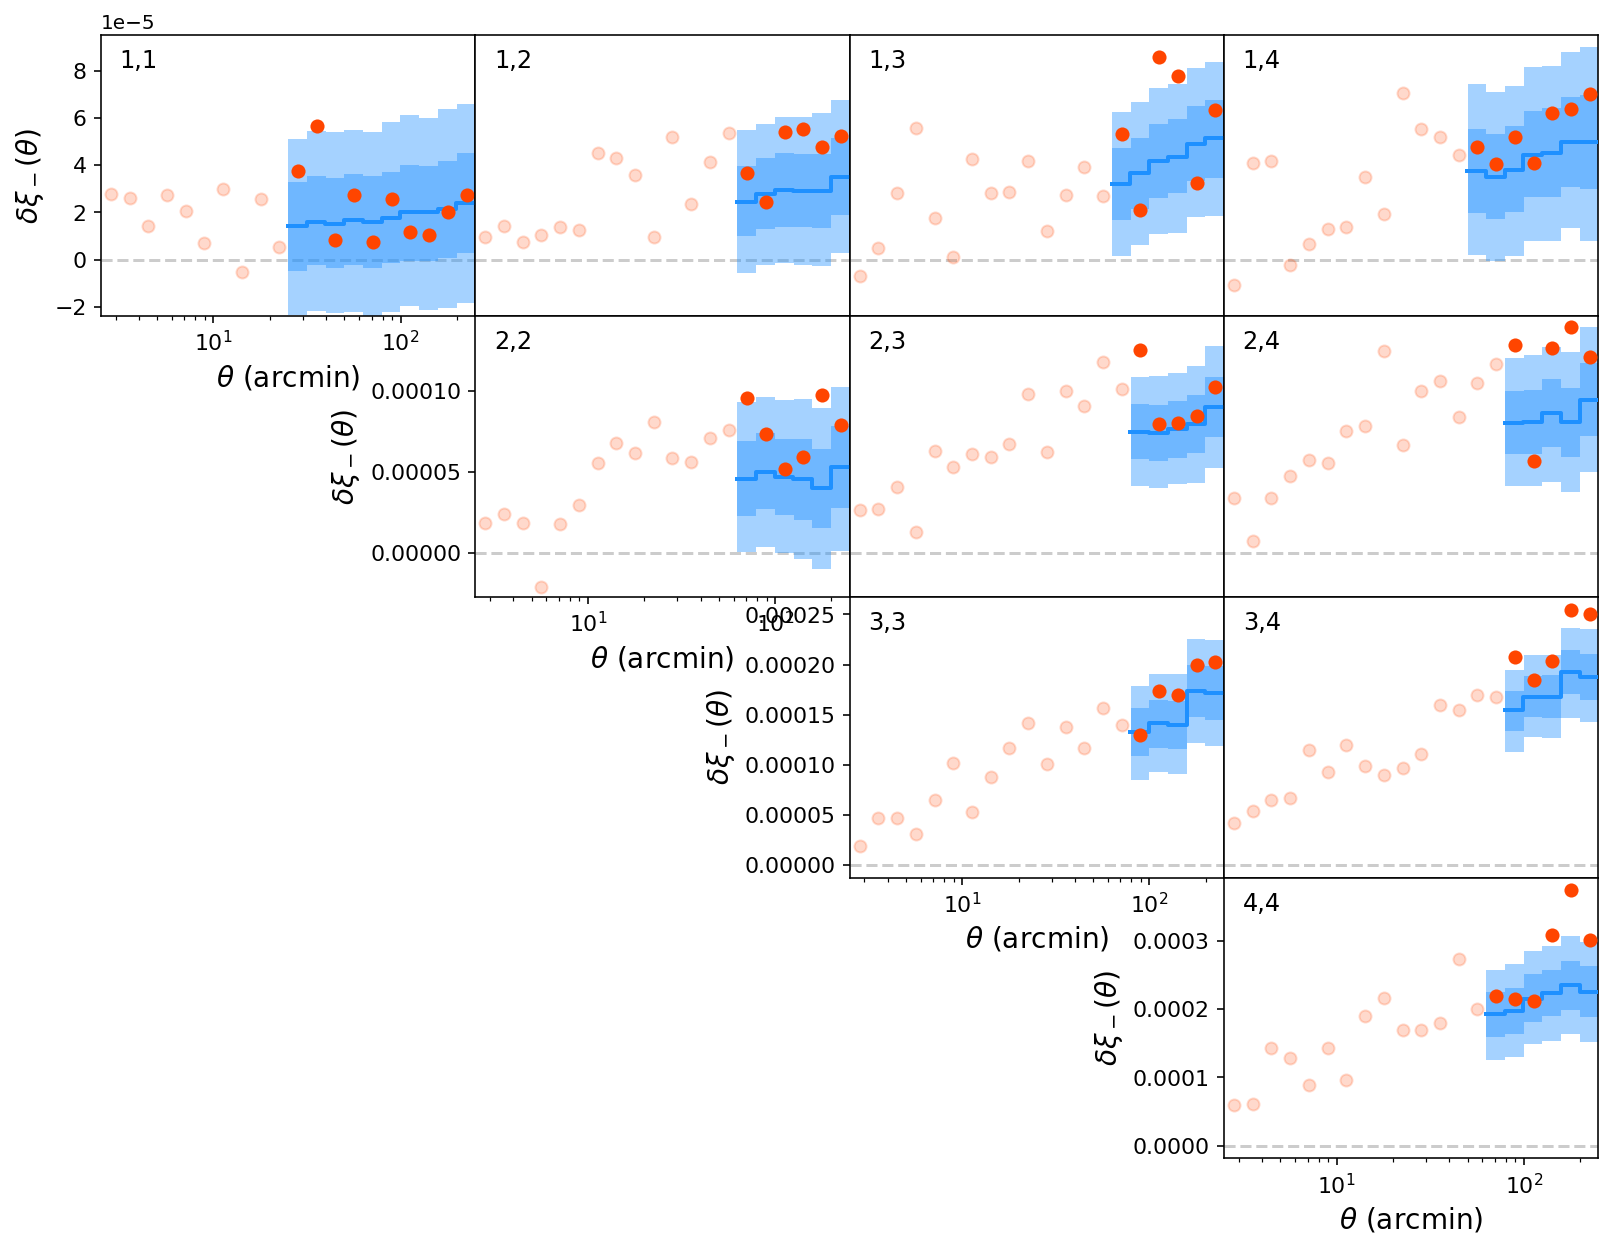

In [20]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# fiducial gammat vs shear+wtheta

In [21]:
RUN_NAME = 'cs_wt_fiducial_lcdm_unblind_02_24_21_covupdatev2_wnz_sr'
RUN_NAME_PPD = 'fiducial_gammat_vs_cswtheta'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['gammat']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_cs_wt_fiducial_lcdm_unblind_02_24_21_covupdatev2_wnz_sr.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_5', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--b4', 'bias_lens--b5', 'intri


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_cs_wt_fiducial_lcdm_unblind_02_24_21_covupdatev2_wnz_sr.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4)], 'wtheta': [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]}
Getting indices for xip
Getting indices for xim
Getting indices for wtheta

Found observables in data_file 

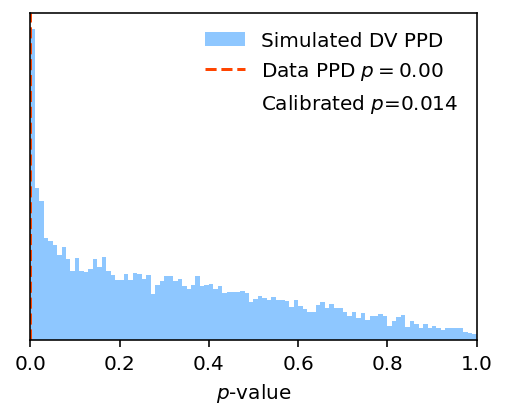

In [22]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim', 'wtheta'],
    data_sets_dprime=['gammat'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit',  # Trying this (different from y1 notebook)
    get_zbin_pair_pcal=True,
#     additional_subsets=additional_subsets
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


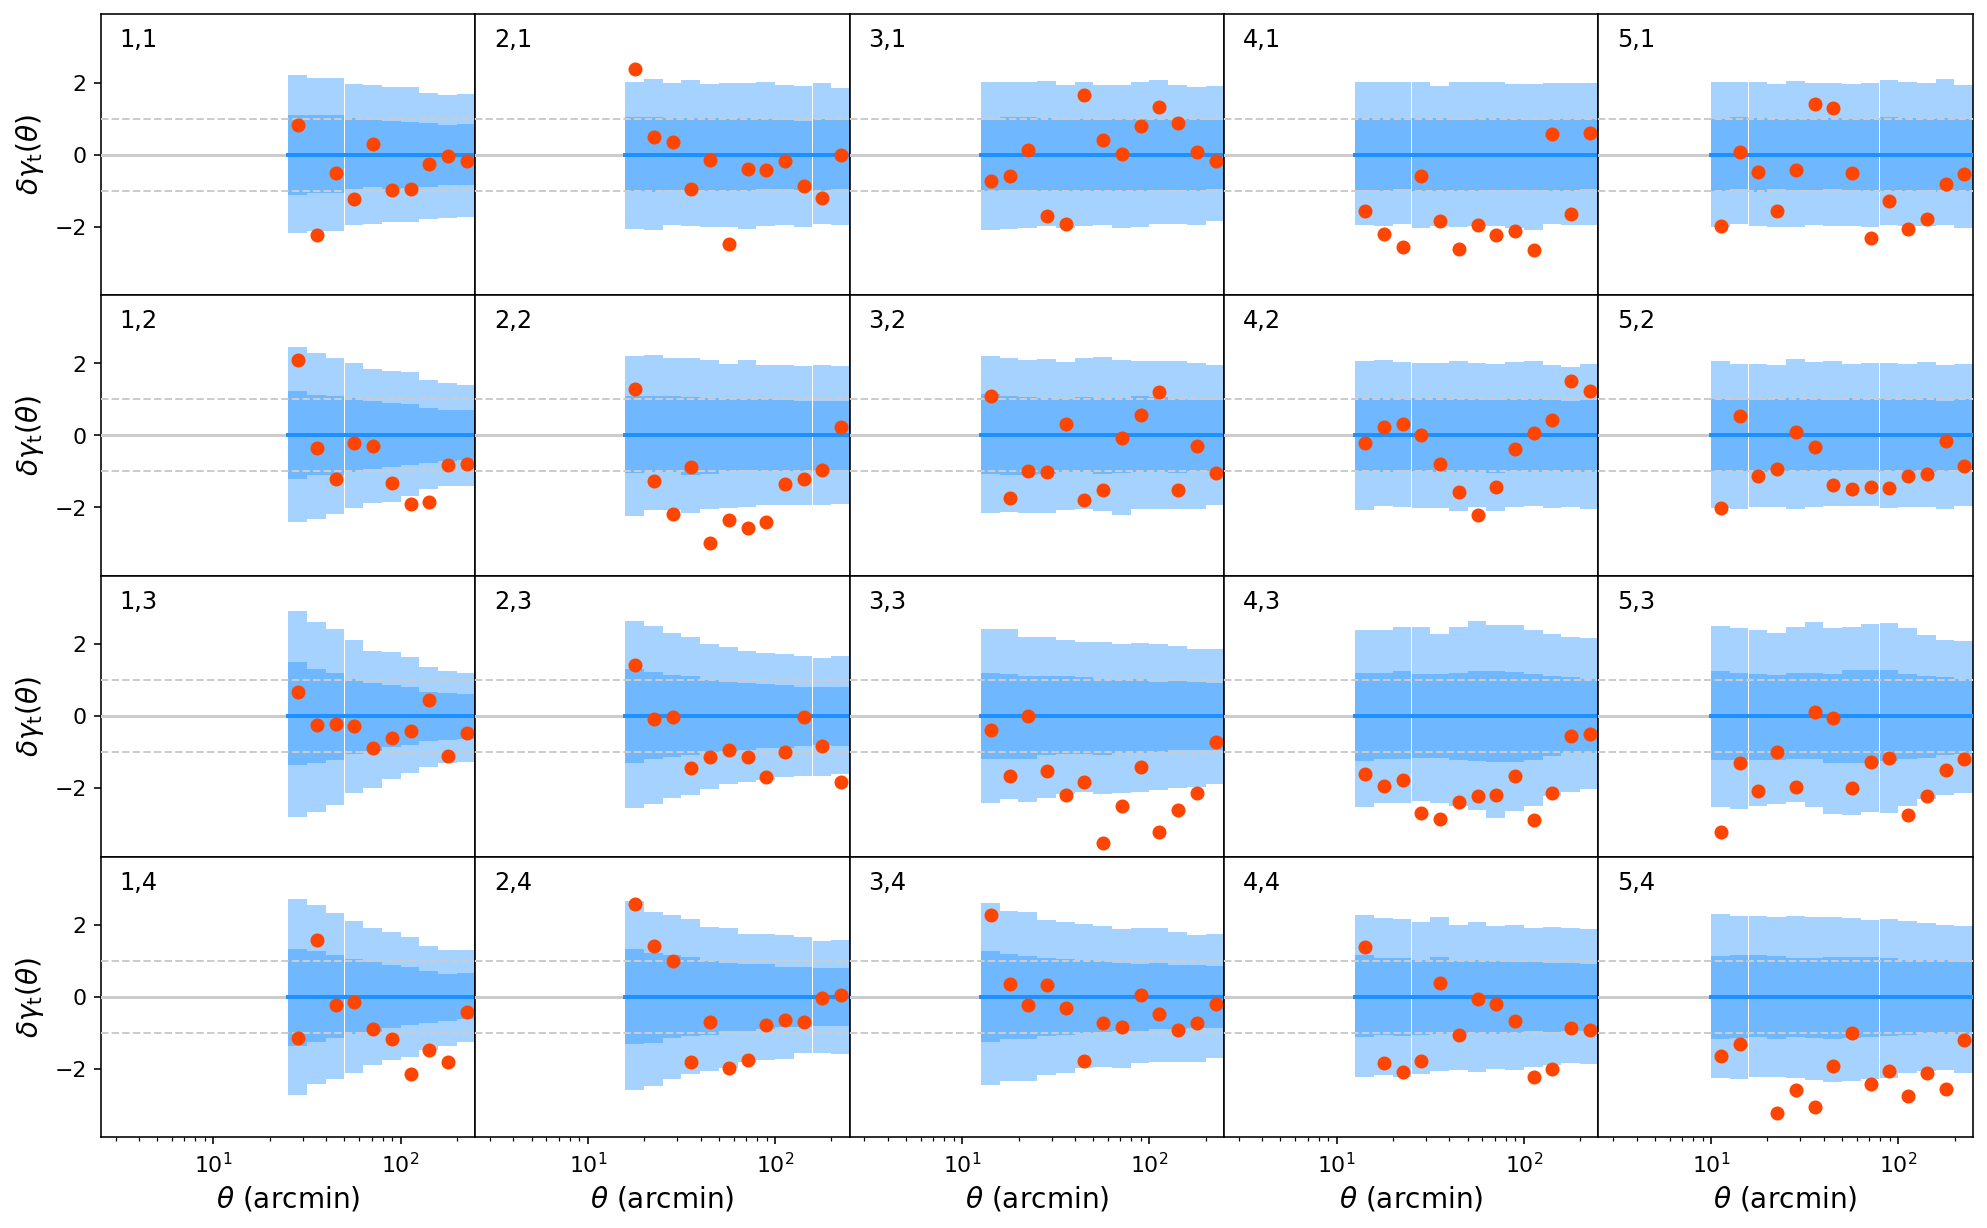

In [23]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 5, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


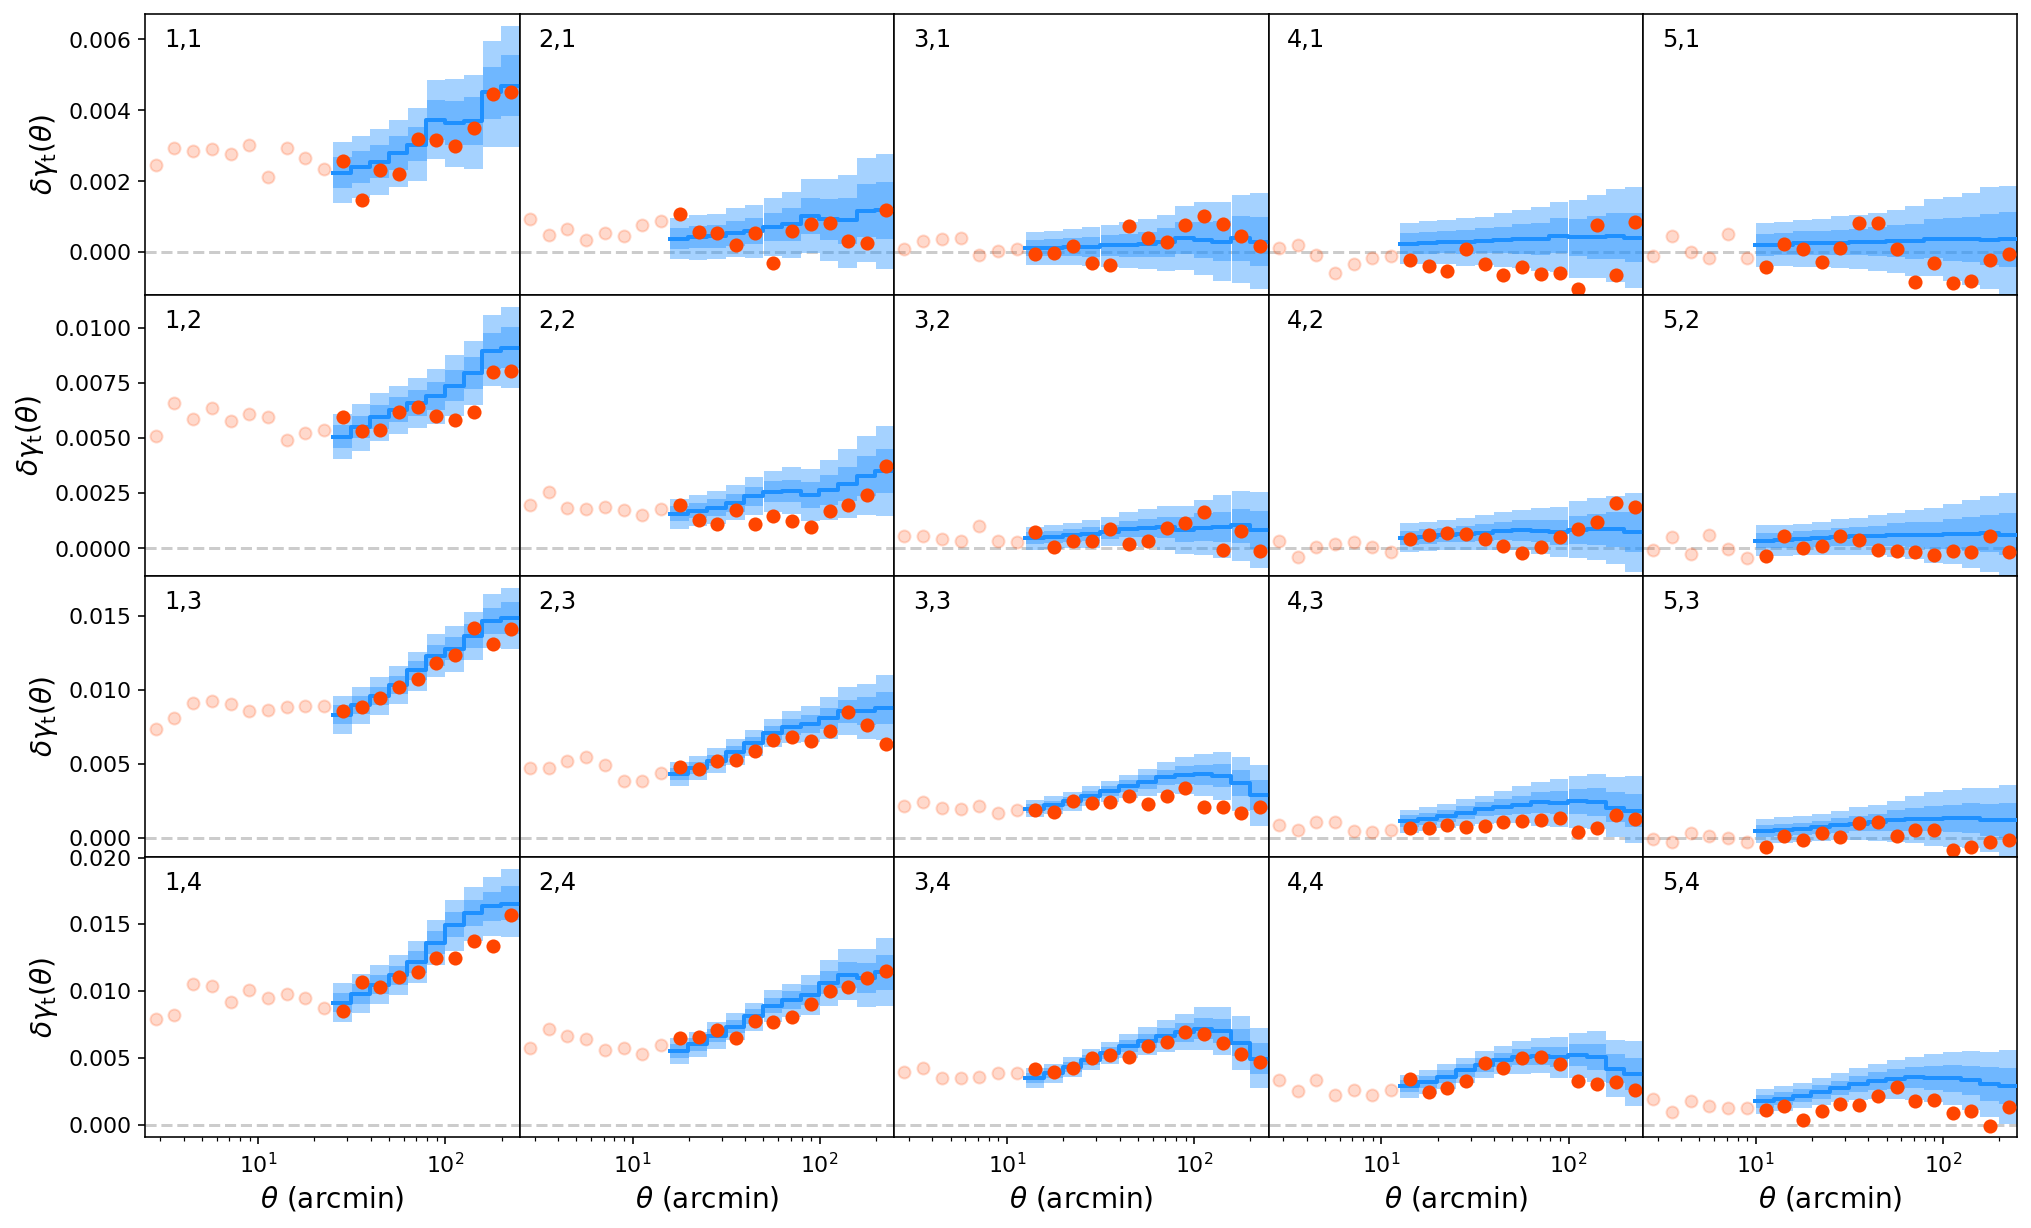

In [24]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('gammat', 4, 5, '$\\delta \\gamma_{\\rm t}(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# fiducial wtheta vs shear+gammat

In [25]:
RUN_NAME = 'cs_gt_fiducial_lcdm_unblind_02_24_21_covupdatev2_wnz_sr'
RUN_NAME_PPD = 'fiducial_wtheta_vs_csgammat'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['wtheta']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_cs_gt_fiducial_lcdm_unblind_02_24_21_covupdatev2_wnz_sr.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_5', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'bias_lens--b4', 'bias_lens--b5', 'intri

In [26]:
additional_subsets = {'wtheta_no56':
{'full':np.concatenate([res[1]['wtheta'][i+1,i+1]['idx_full'] for i in range(4)]),
 'sub':np.concatenate([res[1]['wtheta'][i+1,i+1]['idx_sub'] for i in range(4)])},
                      'wtheta_no6':
{'full':np.concatenate([res[1]['wtheta'][i+1,i+1]['idx_full'] for i in range(5)]),
 'sub':np.concatenate([res[1]['wtheta'][i+1,i+1]['idx_sub'] for i in range(5)])}}


###############################
## Loading chains #############
###############################
Loading Polychord chain at
/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/chain_cs_gt_fiducial_lcdm_unblind_02_24_21_covupdatev2_wnz_sr.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4)], 'wtheta': [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]}
Getting indices for xip
Getting indices for xim
Getting indices for gammat

Found observables in data_file 

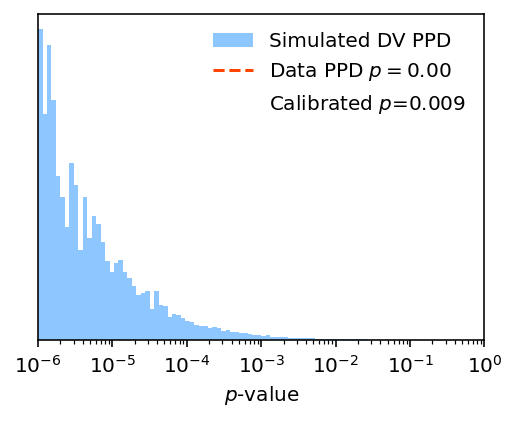

In [27]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim', 'gammat'],
    data_sets_dprime=['wtheta'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    use_logit=(1e-6,1),
    sample_from='best-fit',  # Trying this (different from y1 notebook),
    additional_subsets=additional_subsets
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2


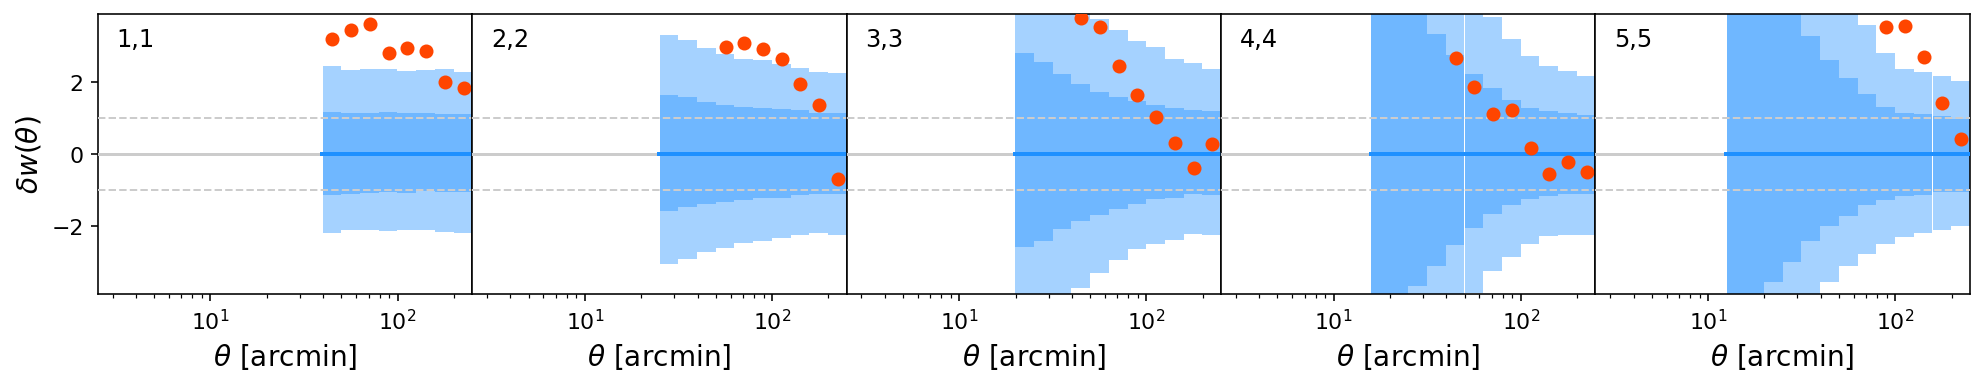

In [28]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 5, '$\\delta w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


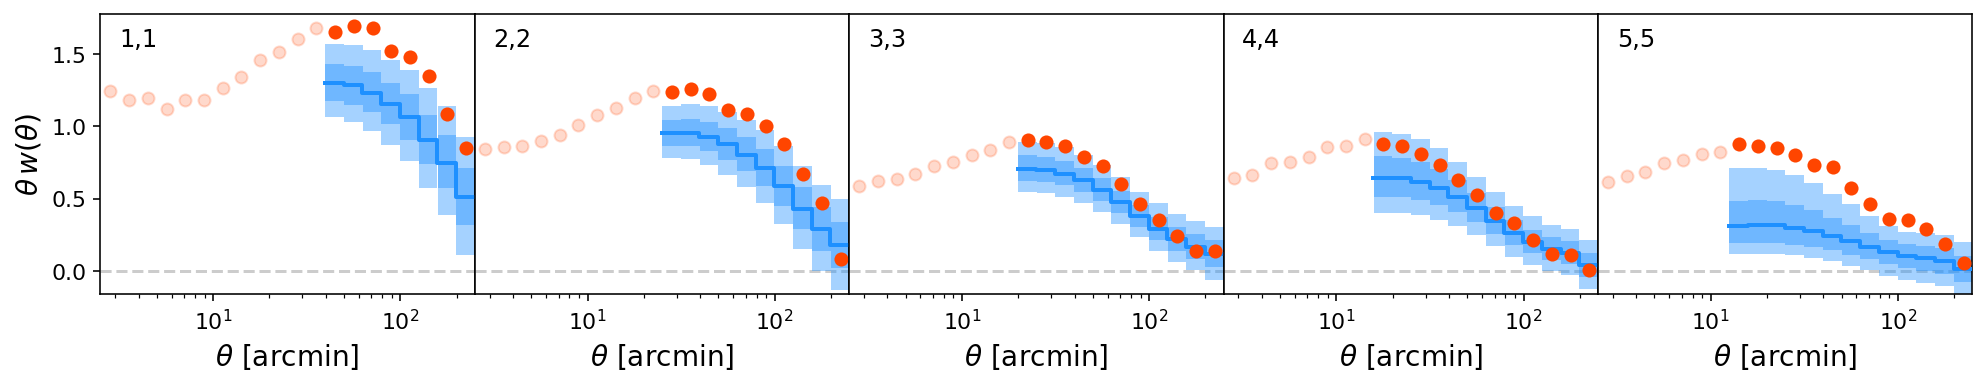

In [29]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('wtheta', 1, 5, '$\\theta \\, w(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

In [30]:
xi_ss = {i:[] for i in range(6)}
for i in range(6):
    idx = dico_indices['wtheta'][i+1,i+1]['idx_sub']
    for j in range(len(ppd_theory)):
#         xi_ss[i].append((ppd_data_obs[idx] - ppd_theory[j,idx])/(1+ppd_chain['bias_lens--b{}'.format(i+1)][j]**2))
        xi_ss[i].append((ppd_data_obs[idx] - ppd_theory[j,idx])/(1+ppd_theory[j,idx]))
    xi_ss[i] = np.array(xi_ss[i])

KeyError: (6, 6)

In [ ]:
theta_edges = np.geomspace(2.5,250,21)
theta_mid = np.exp(0.5*(np.log(theta_edges[:-1])+np.log(theta_edges[1:])))

In [ ]:
fig, axes = plt.subplots(1,6, sharex=True, sharey=True, figsize=(16,3))
for i in range(6):
    low, med, upp = np.array([ppd_plots.weighted_quantile(xi_ss[i][:,_i],[0.16, 0.5, 0.84], sample_weight=weights) for _i in range(xi_ss[i].shape[1])]).T
    ax = axes[i]
    ax.loglog(theta_mid[-xi_ss[i].shape[1]:], med)
    ax.fill_between(theta_mid[-xi_ss[i].shape[1]:], low, upp, alpha=0.3)
    ax.set_xscale('log')
    ax.set_xlabel(r'$\theta$ [arcmin]')
    ax.set_ylabel(r'$\xi_{ss}(\theta)$')
    ax.axhline(y=0, c='0.8')
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()
colors = mpl.cm.YlOrRd(np.linspace(0.2,1,6))
for i in range(6):
    low, med, upp = np.array([ppd_plots.weighted_quantile(xi_ss[i][:,_i],[0.16, 0.5, 0.84], sample_weight=weights) for _i in range(xi_ss[i].shape[1])]).T
    ax.loglog(theta_mid[-xi_ss[i].shape[1]:], med, c=colors[i], label='bin {}'.format(i+1))
    ax.fill_between(theta_mid[-xi_ss[i].shape[1]:], low, upp, alpha=0.3, color=colors[i])
    ax.set_xscale('log')
    ax.set_xlabel(r'$\theta$ [arcmin]')
    ax.set_ylabel(r'$\xi_{ss}(\theta)$')
    ax.axhline(y=0, c='0.8')
plt.tight_layout()
plt.legend()

In [ ]:
fig, ax = plt.subplots()
colors = mpl.cm.YlOrRd(np.linspace(0.2,1,6))
for i in range(6):
    low, med, upp = np.array([ppd_plots.weighted_quantile(xi_ss[i][:,_i],[0.16, 0.5, 0.84], sample_weight=weights) for _i in range(xi_ss[i].shape[1])]).T
    ax.plot(theta_mid[-xi_ss[i].shape[1]:], med, c=colors[i], label='bin {}'.format(i+1))
    ax.fill_between(theta_mid[-xi_ss[i].shape[1]:], low, upp, alpha=0.3, color=colors[i])
    ax.set_xscale('log')
    ax.set_xlabel(r'$\theta$ [arcmin]')
    ax.set_ylabel(r'$\xi_{ss}(\theta)$')
    ax.axhline(y=0, c='0.8')
plt.tight_layout()
plt.legend()